# Overview of the project <a class='anchor' id='overview'></a>

The dataset that is going to be used throughout this notebook contains statistics on the world's billionaires, including information about their businesses, industries, and personal details. Analyzed in detail, it can provide insights into the wealth distriution, business sectors, and demographics of billionaires worldwide.

## Table of contents:

1. [Overview of the project](#overview-of-the-project)
2. [Table of contents](#table-of-contents)
3. [Data dictionary](#data-dictionary)
4. [Part 1. Importing libraries, changing setting to display all columns and loading the dataset](#part-1-importing-libraries-changing-settings-to-display-all-columns-and-loading-the-dataset)
5. [Part 2. Data cleaning](#part-2-data-cleaning)
6. [Part 3. Dataset structural enhancement](#part-3-dataset-structural-enhancement)
7. [Part 4. Data quality improvement](#part-4-data-quality-improvement)
8. [Part 5. Creating the definitive dataset to perform EDA](#part-5-creating-the-definitive-dataset-to-perform-eda)

# 1. Add a table of contents <a class='anchor' id='top'></a>




### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
1. [Part 1](#part1)

## Data dictionary <a class='anchor' id='dictionary'></a>

1. *rank*: The ranking of the billionaire in terms of wealth.
2. *finalWorth*: The final net work of the billionaire in USD.
3. *category*: The category or industry in which the billionaire's business operates.
4. *personName*: The full name of the billionaire.
5. *age*: The age of the billionaire.
6. *country*: The country in which the billionaire resides.
7. *city*: The city in which the billionaire resides.
8. *source*: The source of the billionaire's wealth.
9. *industries*: The industries associated with the billionaire's business interests.
10. *countryOfCitizenship*: The country of citizenship of the billionaire.
11. *organization*: The name of the organization or company associated with the billionaire.
12. *selfMade*: Indicates whether the billionaire is self-made (True/False).
13. *status*: "D' represents self-made billionaires (Founders/Entrepreneurs) and "U" indicates inherited or unerarned wealth.
14. *gender*: The gender of the billionaire.
15. *birthDate*: The birthdate of the billionaire.
16. *lastName*: The last name of the billionaire.
17. *firstName*: The first name of the billionaire.
18. *title*: The title or honorifitc of the billionaire.
19. *date*: The data of data collection.
20. *state*: The state in which the billionaire resides.
21. *residenceStateRegion*: The region or state of residence of the billionaire.
22. *birthYear*: The birth year of the billionaire.
23. *birthMonth*: The birth month of the billionaire.
24. *birthDate*: The birth day of the billionaire.
25. *cpi_country*: Consumer Price Index (CPI) for the billionaire's country.
26. *cpi_change_country*: CPI change for the billionaire's country.
27. *gdp_country*: Gross Domestic Product (GDP) for the billionaire's country.
28. *gross_tertiary_education_enrollment*: Enrollment in tertiary education in the billionaire's country.
29. *gross_primary_education_enrollment_country*: Enrollment in primary education in the billionaire's country.
30. *life_expectancy_country*: Life's expectancy in the billionaire's country.
31. *tax_revenue_country_country*: Tax revenue in the billionaire's country.
32. *total_tax_rate_country*: Total tax rate in the billionaire's country.
33. *population_country*: Population of the billionaire's country.
34. *latitude_country*: Latitude coordinate of the billionaire's country.
35. *longitude_country*: Longitude coordinate of the billionaire's country.

## Part 1. Importing libraries, changing settings to display all columns and loading the dataset <a class='anchor' id='part1'></a>

This part introduces the project by initializing essential libraries for data analysis and exploration. The environment is configured for a comprehensive dataset overview, allowing the exploration of the "Billionaires Statistics Dataset". After the dataset is loaded, initial insights will lay the foundation for further exploration and analysis of billionaire statistics.

[Go back to the table of contents](#table-of-contents)

### Setting up the environment for the project

In [267]:
# Basic libraries for data cleaning and manipulation
import pandas as pd
import numpy as np

# Data visualization packages
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import seaborn as sns
import squarify as sq
import folium as flm
from folium.plugins import MarkerCluster

# Other libraries that are going to be used throughout the project
import pprint
import textwrap
from IPython.display import display



In [268]:
# Setting option to display all columns when viewing the dataset.
pd.set_option('display.max_columns', None)

In [269]:
# Loading the dataset
df_billions = pd.read_csv('Billionaires Statistics Dataset.csv', encoding='utf-8')


### First look at the dataset

In [270]:
# Summarizing the dataset size and structure
print(f'The dataset contains {df_billions.shape[0]:,} rows and {df_billions.shape[1]:,} columns')
print(f'The total number of values contained in the dataset is {df_billions.size:,}')

The dataset contains 2,640 rows and 35 columns
The total number of values contained in the dataset is 92,400


In [271]:
# Using the head() function to take a first look to the dataset
df_billions.head(10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,Bill & Melinda Gates Foundation,True,D,M,10/28/1955 0:00,Gates,Bill,Cochair,4/4/2023 5:01,Washington,West,1955.0,10.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,Bloomberg,True,U,M,2/14/1942 0:00,Bloomberg,Michael,CEO,4/4/2023 5:01,New York,Northeast,1942.0,2.0,14.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,América Móvil,True,U,M,1/28/1940 0:00,Slim Helu,Carlos,Honorary Chairman,4/4/2023 5:01,NaN,NaN,1940.0,1.0,28.0,141.54,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,Reliance Industries,False,D,M,4/19/1957 0:00,Ambani,Mukesh,Founder and Chairman,4/4/2023 5:01,NaN,NaN,1957.0,4.0,19.0,180.44,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,Los Angeles Clippers,True,D,M,3/24/1956 0:00,Ballmer,Steve,Owner,4/4/2023 5:01,Washington,West,1956.0,3.0,24.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


After using the ```head()```, the following conclusions can be done:

1. Column names display a mix of CamelCase, lowercase and underscore. This can be standardize for the sake of uniformity.

2. At first glance, some columns with numeric values are floats (e.g., age, birthYear). Integers are a better choice here because, in general, these types of data don't use decimals.

3. Columns *state* and *residenceStateRegion* seem to contain data only when the *countryOfCitizenship* column is equal to 'United States'. Both columns could be useful for some deeper analysis into the subset data belonging to this country, but if this assumption is correct, for the overall EDA, they have little value.

In [272]:
# Displaying a few random samples from the dataset to investigate further
df_billions.sample(10, random_state=42)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2005,1905,1500,Gambling & Casinos,Jens von Bahr,52.0,Sweden,Stockholm,Gambling products,Gambling & Casinos,Sweden,NaN,True,U,M,2/22/1971 0:00,von Bahr,Jens,NaN,4/4/2023 5:01,NaN,NaN,1971.0,2.0,22.0,110.51,1.8,"$530,832,908,738",67.0,126.6,82.5,27.9,49.1,1.028545e+07,60.128161,18.643501
32,33,38000,Diversified,Li Ka-shing,94.0,Hong Kong,NaN,Diversified,Diversified,Hong Kong,CK Hutchison Holdings,True,U,M,6/13/1928 0:00,Li,Ka-shing,Senior Advisor,4/4/2023 5:01,NaN,NaN,1928.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,949,3100,Fashion & Retail,Aerin Lauder,52.0,United States,New York,Estee Lauder,Fashion & Retail,United States,NaN,False,D,F,4/23/1970 0:00,Lauder,Aerin,NaN,4/4/2023 5:01,New York,Northeast,1970.0,4.0,23.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
1461,1434,2100,Diversified,Douglas Hsu,80.0,Taiwan,Taipei,Diversified,Diversified,Taiwan,NaN,False,D,M,8/24/1942 0:00,Hsu,Douglas,NaN,4/4/2023 5:01,NaN,NaN,1942.0,8.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,466,5500,Media & Entertainment,Katharine Rayner,78.0,United States,East Hampton,"Media, automotive",Media & Entertainment,United States,NaN,False,U,F,1/12/1945 0:00,Rayner,Katharine,NaN,4/4/2023 5:01,New York,Northeast,1945.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
1272,1272,2400,Automotive,Abdulla Al Futtaim & family,83.0,United Arab Emirates,Dubai,"Auto dealers, investments",Automotive,United Arab Emirates,NaN,False,D,M,1/1/1940 0:00,Al Futtaim,Abdulla,NaN,4/4/2023 5:01,NaN,NaN,1940.0,1.0,1.0,114.52,-1.9,"$421,142,267,938",36.8,108.4,77.8,0.1,15.9,9.770529e+06,23.424076,53.847818
211,208,9200,Technology,Azim Premji,77.0,India,Bangalore,Software services,Technology,India,Wipro Ltd.,False,D,M,7/24/1945 0:00,Premji,Azim,Founder Chairman,4/4/2023 5:01,NaN,NaN,1945.0,7.0,24.0,180.44,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
1309,1272,2400,Manufacturing,Yang Weidong & family,54.0,China,Jiaxing,Chemicals,Manufacturing,China,NaN,True,D,M,9/9/1968 0:00,Yang,Weidong,NaN,4/4/2023 5:01,NaN,NaN,1968.0,9.0,9.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
1745,1725,1700,Real Estate,William Heinecke,73.0,Thailand,Bangkok,Hotels,Real Estate,Thailand,NaN,True,E,M,6/4/1949 0:00,Heinecke,William,NaN,4/4/2023 5:01,NaN,NaN,1949.0,6.0,4.0,113.27,0.7,"$543,649,976,166",49.3,99.8,76.9,14.9,29.5,6.962558e+07,15.870032,100.992541
1498,1434,2100,Food & Beverage,Sun Mengquan & family,73.0,China,Yantai,Edible oil,Food & Beverage,China,NaN,True,D,M,3/1/1950 0:00,Sun,Mengquan,NaN,4/4/2023 5:01,NaN,NaN,1950.0,3.0,1.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


The ```sample()``` function provides additional information:
1. There are null values presented in the dataset, in particular where the *country* column is a disputed territory (e.g., Taiwan) or a subdivision (e.g., Hong Kong). Also, the *organization* column seems to have many null values as well.

2. *status* and *gender* columns are abbreviated. Without a data dictionary, it may be difficult for anyone not familiarized with the dataset to guess what these columns mean when looking at the data directly. These values could be converted into a meaningful strings and then transformed further for advanced processing or data modeling.

3. The *population_country* column is displayed with values in scientific notation, making it difficult to interpret them.

4. The previous assumption regarding the *state* and *residenceStateRegion* seems strong, as the sample data confirms that for countries other than the United States, the values in this column are null.

### Data types and summary statistics with ``dtypes``, ``info()`` and ``describe()``

In [273]:
# Using dtypes to check what type of data is contained in each column
print(f'The data types of the columns in the dataset are:\n\n{df_billions.dtypes}')

The data types of the columns in the dataset are:

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                          

In [274]:
# Displaying the count of each data type in the dataset
dtype_counts = df_billions.dtypes.value_counts()

# Looping through the unique data tpyes and print sentences
for dtype, count in dtype_counts.items():
    print(f'There are {count} columns with data type {dtype} in the dataset')

There are 18 columns with data type object in the dataset
There are 14 columns with data type float64 in the dataset
There are 2 columns with data type int64 in the dataset
There are 1 columns with data type bool in the dataset


After using the `dtypes` attribute, the following can be said:
1. Objects (aka strings) are the most common data type in the dataset. However, some of them like *birthDate* and *date* should be converted into the appropriate data type, just to name a few.

2. The dataset has two columns that apparently give the same information in a different way:

   1. The *selfMade* column tells us whether the billionaire is self-made. It's a boolean data type.
   2. The *status* column represents a self-made billionaires with a 'D' and billionaires with inherited or unearned wealth with an 'U'.

   These two columns should match; it wouldn't have sense a row with a `True` value in the *selfMade* column and an 'U' value in the *status* column, indicating the billionaire's wealth as inherited or unearned. In the data quality section the relationship between these two columns will be explored further.

3. The *gdp_country* column has an `object` data type because of the $ symbol before the value of the country's GDP. It should be converted into the appropriate type to use it in the EDA.

In [275]:
# Using the info method to get a summary of the dataset
print(f'Dataset summary information provided by the info() method\n')
df_billions.info()

Dataset summary information provided by the info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship      

From the `info()` method, some comments can be made:

1. *organization* and *title* columns have the greatest amount of nulls in the whole dataset. Other columns with high quantity of nulls include *state* and *residenceStateRegion*; another hint about the exclusive relationship of these columns with US-based billionaire data.

2. float64 datatype is present in columns where is not most suitable option, like *age*, age-related columns (*birthYear*, *birthMonth*, and *birthDay*) and *population_country*.

3. object types appear in date-related columns, which indicates that conversion of these values should be done to prepare them for analysis.



In [276]:
# Using the describe method to get summary statistics of the dataset
print(f'Summary statistics of the dataset with the describe() method\n')
df_billions.describe()

Summary statistics of the dataset with the describe() method



,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


From the `describe()` method, some comments can be made:

1. The dataset has 2,640 values, but the *rank* column maximum is 2,540. This suggests that some of the billionaire's included in the dataset have the same fortune, and thus, the same rank. Otherwise, the maximum value of the *rank* column should be equal to the number of rows in the dataset.

2. The minimum value in the *finalworth* column is 1,000. This means that a billionaire needs to have at least a fortune of 1 billion to be included. It's a way to validate our data is correct and only have billionaire and not millionaire people.

3. There are no wrong values in columns like *age*, *birthYear*, *birthMonth*, *life_expectancy_country* and *population_country*. In particular, negative values, which wouldn't make sense, are not present in the mentioned columns.

4. The maximum value of the *gross_tertiary_education_enrollment* and *gross_primary_education_enrollment* columns in greater than 100. It could be useful to dive deeper into the way these rates are calculated and if values greater than 100 make sense.

5. A similar thing can be said about the *tax_revenue_country_country* and *total_tax_rate_country* columns (in particular the last one, because it has a maximum value of 106).

## Part 2. Data Cleaning <a class='anchor' id='part2'></a>

The main objective of this part is dealing with one of the most common tasks Data Analysts need to do when facing a dataset: data cleaning. In particular, null values are of the most interest, as they can have negative effects in the analysis, from skewing metrics to prevent code from working properly.

The dataset used in this notebook doesn't contain a great amount of data, so cleaning it thoroughly is even more necessary to ensure that the maximum quantity of data is well-suited for analysis.

To deal with null values different actions will be performed based on columns' similarity. To understand which columns are most close to each other, the data dictionary is a useful resource, as it's looking at the different datatypes and columns' names.

[Go back to the table of contents](#table-of-contents)

### Null values

#### Overall view of null values

In [277]:
# Finding the number of null values by column
print(f'The number of null values in each column in the dataset is:\n\n{df_billions.isna().sum()}')

The number of null values in each column in the dataset is:

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                 

In [278]:
# Calculating and formatting the percentage of null values for each column
na_percent = (df_billions.isnull().sum() / df_billions.shape[0] * 100).round(2)
print(f'The percentage of null values in each column in the dataset is:\n\n{na_percent}')

The percentage of null values in each column in the dataset is:

rank                                           0.00
finalWorth                                     0.00
category                                       0.00
personName                                     0.00
age                                            2.46
country                                        1.44
city                                           2.73
source                                         0.00
industries                                     0.00
countryOfCitizenship                           0.00
organization                                  87.69
selfMade                                       0.00
status                                         0.00
gender                                         0.00
birthDate                                      2.88
lastName                                       0.00
firstName                                      0.11
title                                         87.16

In [279]:
# Categorizing columns based on the percentage of null values over the total rows presented in the dataset
# Initializing counts for each threshold range

count_0 = 0
count_0_25 = 0
count_25_50 = 0
count_50_75 = 0
count_75_100 = 0

# Iterating through the columns and accumulate counts within each threshold range
for percent in na_percent:
    if percent == 0:
        count_0 += 1
    elif percent > 0 and percent <= 25:
        count_0_25 += 1
    elif percent > 25 and percent <= 50:
        count_25_50 += 1
    elif percent > 50 and percent <= 75:
        count_50_75 += 1
    else:
        count_75_100 += 1

# Calculating the proportion for each threshold range
p_0 = count_0 / df_billions.shape[1]
p_0_25 = count_0_25 / df_billions.shape[1]
p_25_50 = count_25_50 / df_billions.shape[1]
p_50_75 = count_50_75 / df_billions.shape[1]
p_75_100 = count_75_100 / df_billions.shape[1]

# Creating print statements to display results
print(f'{count_0} out of {df_billions.shape[1]} columns presented in the dataset ({p_0:.2%} of the total) have no null values')
print(f'{count_0_25} out of {df_billions.shape[1]} columns presented in the dataset ({p_0_25:.2%} of the total) have up to 25% null values')
print(f'{count_25_50} out of {df_billions.shape[1]} columns presented in the dataset ({p_25_50:.2%} of the total) have between 25% and 50% null values')
print(f'{count_50_75} out of {df_billions.shape[1]} columns presented in the dataset ({p_50_75:.2%} of the total) have between 50% and 75% of null values')
print(f'{count_75_100} out of {df_billions.shape[1]} columns presented in the dataset ({p_75_100:.2%} of the total) have more than 75% of null values')

12 out of 35 columns presented in the dataset (34.29% of the total) have no null values
19 out of 35 columns presented in the dataset (54.29% of the total) have up to 25% null values
0 out of 35 columns presented in the dataset (0.00% of the total) have between 25% and 50% null values
2 out of 35 columns presented in the dataset (5.71% of the total) have between 50% and 75% of null values
2 out of 35 columns presented in the dataset (5.71% of the total) have more than 75% of null values


After taking a first look to null values as a whole, it can be said that:

1. The dataset has 35 columns. Of them, 12 don't have any null value. 4 of them have more than 50% of null values and the rest are in between.

2. Null values are concentrated in specific columns. The four columns with highest null value proportion increase the occurrence of null values for the entire dataset. If these columns are removed, the same analysis shows a fall in the presence of null values from ~12% to less than 3%, with the highest proportion of null values being ~7%.

#### Conducting a comparative analysis to discover the influence of columns with high proportion of null values

In [280]:
# Finding the total number of nulls in the dataset
total_nulls = df_billions.isnull().sum().sum()
total_size = df_billions.size
null_p = total_nulls / total_size
median_null_p = np.median(df_billions.isnull().mean())

# Printing statements related to null values
print(f'{total_nulls:,} out of {total_size:,} (or {null_p:.2%}) of the values are null')
print(f'The median null values per column is {median_null_p:.2%}')

10,812 out of 92,400 (or 11.70%) of the values are null
The median null values per column is 2.88%


In [281]:
# Finding the Top 5 columns with the highest proportion of null values
print(f'The Top 5 columns with more percentage of null values are:\n\n{na_percent.sort_values(ascending=False).head(5)}')

The Top 5 columns with more percentage of null values are:

organization            87.69
title                   87.16
residenceStateRegion    71.70
state                   71.48
cpi_change_country       6.97
dtype: float64


In [282]:
# Slicing the dataset to drop columns with high proportion of null values
df_billions_subset = df_billions.drop(columns=['organization', 'title', 'residenceStateRegion', 'state'])
total_nulls_subset = df_billions_subset.isnull().sum().sum()
total_size_subset = df_billions_subset.size
null_p_subset = total_nulls_subset / total_size_subset
median_null_p_subset = np.median(df_billions_subset.isnull().mean())

# Printing statements related to columns with high proportion of null values
print(f'If the four columns with highest proportion of nulls are removed, {total_nulls_subset:,} out of {total_size_subset:,} (or {null_p_subset:.2%}) of the values are null.')
print(f'The median null values per column is {median_null_p_subset:.2%}')

If the four columns with highest proportion of nulls are removed, 2,416 out of 81,840 (or 2.95%) of the values are null.
The median null values per column is 2.73%


In [283]:
# Slicing the dataset to find columns with highest and lowest amount of null values
na_percent_subset = (df_billions_subset.isnull().sum() / df_billions.shape[0] * 100).round(2)

print(f'The Top 5 columns with highest proportion of null values after removing the first four are:\n\n{na_percent_subset.sort_values(ascending=False).head(5)}')
print(f'\nThe Bottom 5 columns with the lowest proportion of null values other than zero are:\n\n{na_percent_subset[na_percent_subset != 0].sort_values(ascending=False).tail(5)}')

The Top 5 columns with highest proportion of null values after removing the first four are:

cpi_country                            6.97
cpi_change_country                     6.97
tax_revenue_country_country            6.93
life_expectancy_country                6.89
gross_tertiary_education_enrollment    6.89
dtype: float64

The Bottom 5 columns with the lowest proportion of null values other than zero are:

birthDate    2.88
city         2.73
age          2.46
country      1.44
firstName    0.11
dtype: float64


In this section, the following conclusions can be made:

1. 11.70% of the values in the dataset are nulls. This is the mean number of null values each column has. However, the median value of nulls in each column is 2.88%. This suggests that some columns have a high proportion of null values, thus increasing its overall presence in the dataset.

2. The columns with more null values are:
   1. *organization:* with a proportion of 87.69%.
   2. *title:* with a proportion of 87.16%.
   3. *residenceStateRegion:* with a proportion of 71.70%.
   4. *state:* with a proportion of 71.48%
   
   The last two columns are suspected to contain values only where the country column is equal to 'United States'. Further investigation is needed to verify this assumption.

3. When all these columns with high null value count are sliced from the dataset, the mean and median proportion of nulls falls to 2.95% and 2.73% in the order given.

4. After removing the 4 columns with high proportion of null values from the dataset, the highest number of null values can be found in the *cpi_country* and *cpi_change_country* columns.

5. The lowest amount of null values can be found in columns related millionaires' personal information, like *country* and *firstName*.

#### Dealing with null values

##### Figuring out the relation between the *country*, *state* and *residenceStateRegion* columns.

After taking the first look to the dataset earlier, it was reasonable to think that *state* and *residenceStateRegion* columns have data only when the value  in the *country* column is 'United States'. The goal of this subsection is to dive deeper into this assumption and see if it's true.

In [284]:
# Making a copy of the original dataset to perform modifications
df_billions_na = df_billions.copy()

# Printing number of null values in the selected columns
print(f'The country column has {(df_billions_na["country"]!="United States").sum():,} null values')
print(f'The state column has {df_billions_na["state"].isna().sum():,} null values')
print(f'The residenceStateRegion has {df_billions_na["residenceStateRegion"].isna().sum():,} null values')

The country column has 1,886 null values
The state column has 1,887 null values
The residenceStateRegion has 1,893 null values


In [285]:
# Creating filtered datasets to see null values in the selected columns
b_mask_1 = ((df_billions_na['state'].isna()) & (df_billions_na['country'] == 'United States'))
print(f'The row where state information is missing and residenceStateRegion is not is as follows:\n')
display(df_billions_na[b_mask_1])

b_mask_2 = ((df_billions_na['residenceStateRegion'].isna()) & (df_billions_na['country'] == 'United States'))
print(f'\nThe rows where residenceStateRegion value is missing and state is not are as follows:\n')
display(df_billions_na[b_mask_2])

The row where state information is missing and residenceStateRegion is not is as follows:



,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
700,699,4000,Food & Beverage,Elisabeth DeLuca & family,75.0,United States,NaN,Subway,Food & Beverage,United States,NaN,False,N,F,7/25/1947 0:00,DeLuca,Elisabeth,NaN,4/4/2023 5:01,NaN,South,1947.0,7.0,25.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891



The rows where residenceStateRegion value is missing and state is not are as follows:



,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
358,352,6800,Technology,Gordon Moore,94.0,United States,Woodside,Intel,Technology,United States,Intel Corp.,True,D,M,1/3/1929 0:00,Moore,Gordon,Cofounder and Chairman Emeritus,4/4/2023 5:01,California,NaN,1929.0,1.0,3.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
521,511,5200,Real Estate,Sam Zell,81.0,United States,Chicago,"Real estate, private equity",Real Estate,United States,NaN,True,D,M,9/28/1941 0:00,Zell,Sam,NaN,4/4/2023 5:01,Illinois,NaN,1941.0,9.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
963,949,3100,Food & Beverage,Sheldon Lavin,90.0,United States,Highland Park,Meat processing,Food & Beverage,United States,NaN,True,U,M,6/17/1932 0:00,Lavin,Sheldon,NaN,4/4/2023 5:01,Illinois,NaN,1932.0,6.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
1339,1312,2300,Food & Beverage,Clayton Mathile,82.0,United States,Brookville,Pet food,Food & Beverage,United States,NaN,True,E,M,1/11/1941 0:00,Mathile,Clayton,"Investor, Philanthropist",4/4/2023 5:01,Ohio,NaN,1941.0,1.0,11.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
1733,1725,1700,Food & Beverage,Carl DeSantis,83.0,United States,Delray Beach,Energy drink,Food & Beverage,United States,NaN,True,U,M,7/19/1939 0:00,DeSantis,Carl,NaN,4/4/2023 5:01,Florida,NaN,1939.0,7.0,19.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
2167,2133,1300,Real Estate,Marvy Finger,87.0,United States,Houston,Real estate,Real Estate,United States,NaN,True,E,M,12/8/1935 0:00,Finger,Marvy,NaN,4/4/2023 5:01,Texas,NaN,1935.0,12.0,8.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
2547,2540,1000,Media & Entertainment,Jimmy Buffett,76.0,United States,Palm Beach,"Entertainment, Margaritaville",Media & Entertainment,United States,NaN,True,N,M,12/25/1946 0:00,Buffett,Jimmy,Musician,4/4/2023 5:01,Florida,NaN,1946.0,12.0,25.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891


In [286]:
# Filling null values in the state and residenceStateRegion columns where country is 'United States'
df_billions_na.loc[b_mask_1, ['state', 'residenceStateRegion']] = 'Unknown'
df_billions_na.loc[b_mask_2, 'residenceStateRegion'] = 'Unknown'

# Displaying the columns of interest in the filtered dataset to verify changes 
print('Verifying the row without values in the state column is setup to "Unknown"\n')
display(df_billions_na[['country', 'state', 'residenceStateRegion']][b_mask_1])
print('\nVerifying the rows without values in the residenceStateColumn are setup to "Unknown"\n')
display(df_billions_na[['country', 'state', 'residenceStateRegion']][b_mask_2])

# Counting again the number of null values in the country, state and residenceStateRegion columns
print(f'After addressing impaired null values in subdivisions, null values total in the country column is: {(df_billions_na["country"]!="United States").sum():,}')
print(f'After addressing impaired null values in subdivisions, null values total in the state column is: {df_billions_na["state"].isna().sum():,}')
print(f'After addressing impaired null values in subdivisions, null values total in the residenceStateRegion column is: {df_billions_na["residenceStateRegion"].isna().sum():,}')

Verifying the row without values in the state column is setup to "Unknown"



,country,state,residenceStateRegion
700,United States,Unknown,Unknown



Verifying the rows without values in the residenceStateColumn are setup to "Unknown"



,country,state,residenceStateRegion
358,United States,California,Unknown
521,United States,Illinois,Unknown
963,United States,Illinois,Unknown
1339,United States,Ohio,Unknown
1733,United States,Florida,Unknown
2167,United States,Texas,Unknown
2547,United States,Florida,Unknown


After addressing impaired null values in subdivisions, null values total in the country column is: 1,886
After addressing impaired null values in subdivisions, null values total in the state column is: 1,886
After addressing impaired null values in subdivisions, null values total in the residenceStateRegion column is: 1,886


In [287]:
# Creating filtered datasets to see null values in the selected columns
b_mask_3 = ((df_billions_na['state'].isna()) & (df_billions_na['country'] != 'United States'))
b_mask_4 = ((df_billions_na['residenceStateRegion'].isna()) & (df_billions_na['country'] != 'United States'))

# Filling null values in the state and residenceStateRegion columns where country is not 'United States'
df_billions_na.loc[b_mask_3, ['state', 'residenceStateRegion']] = 'No subdivisions info'
df_billions_na.loc[b_mask_4, ['state', 'residenceStateRegion']] = 'No subdivisions info'

# Displaying the columns of interest in the filtered dataset to verify changes 
print('Changes in the state and residenceStateRegion columns after setting them up to "Unknown" for countries other than the US')
display(df_billions_na[['country', 'state', 'residenceStateRegion']][b_mask_3].head(5))

# Counting again the number of null values in the country, state and residenceStateRegion columns
print(f'The number of rows with a country other than the US is: {(df_billions_na["country"]!="United States").sum():,}')
print(f'After cleaning rows without subdivisions info, the number of null values in the state column is: {df_billions_na["state"].isna().sum():,}')
print(f'After cleaning rows without subdivisions info, the number of null values in the residenceStateRegion is: {df_billions_na["residenceStateRegion"].isna().sum():,}')

Changes in the state and residenceStateRegion columns after setting them up to "Unknown" for countries other than the US


,country,state,residenceStateRegion
0,France,No subdivisions info,No subdivisions info
7,Mexico,No subdivisions info,No subdivisions info
8,India,No subdivisions info,No subdivisions info
10,France,No subdivisions info,No subdivisions info
12,Spain,No subdivisions info,No subdivisions info


The number of rows with a country other than the US is: 1,886
After cleaning rows without subdivisions info, the number of null values in the state column is: 0
After cleaning rows without subdivisions info, the number of null values in the residenceStateRegion is: 0


After reviewing the 3 columns, some conclusions can be made:

1. It's clear that rows whose *country* attribute is 'United States' have a null value in the *state* and *residenceStateRegion* because the counts are almost exact to each other (1,886 rows with a *country* attribute other than 'United States vs 1,887 rows with null values in the *state* attribute and 1,893 in the *residenceStateRegion* attribute.)

2. There are some rows whose *country* attribute is 'United States' and have null values in the related columns (1 in the *state* column and 7 in the *residenceStateRegion* column).

3. For the rows whose *country* is 'United States' the null values in the *country* and *residenceStateRegion* have been changed to 'Unknown' whereas in the other cases, the string selected is 'No subdivisions info' to make it clear the dataset only contains information in this columns for United States.

##### Taking a look to null values in *organization* and *title* columns.



In [288]:
# Priting the amount of different values in both columns
print(f'The number of unique values in the organization column is: {df_billions_na["organization"].nunique()}')
print(f'The number of unique values in the title column is: {df_billions_na["title"].nunique()}')

# Displaying some unique values in both columns
display((df_billions_na['organization'].unique().tolist()[:5]))
display((df_billions_na['title'].unique().tolist()[:5]))

The number of unique values in the organization column is: 294
The number of unique values in the title column is: 97


['LVMH Moët Hennessy Louis Vuitton',
 'Tesla',
 'Amazon',
 'Oracle',
 'Berkshire Hathaway Inc. (Cl A)']

['Chairman and CEO',
 'CEO',
 'Chairman and Founder',
 'CTO and Founder',
 'Cochair']

There are 294 and 97 different values in the *organization* and *title* columns. Despite of this, more than 70% of the values in these columns are null. The best option is to set the null values to 'Unknown' in both columns because they aren't going to be used in the EDA part.

In [289]:
# Filling null values in the organization and title columns
df_billions_na.loc[df_billions_na['organization'].isna(), 'organization'] = 'Unknown'
df_billions_na.loc[df_billions_na['title'].isna(), 'title'] = 'Unknown'

# Printing the null value count to verify changes
print(f'After cleaning null values in the organization column, its number of nulls is: {df_billions_na["organization"].isna().sum()}')
print(f'After cleaning null values in the title column, its number of nulls is: {df_billions_na["title"].isna().sum()}')


After cleaning null values in the organization column, its number of nulls is: 0
After cleaning null values in the title column, its number of nulls is: 0


In [290]:
# Updating number of null values by column
print('At this stage of the data cleaning process, the number of null values by column is as follows:')
df_billions_na.isna().sum()[df_billions_na.isna().sum() > 0].sort_values(ascending=False)

At this stage of the data cleaning process, the number of null values by column is as follows:


cpi_change_country                            184
cpi_country                                   184
tax_revenue_country_country                   183
total_tax_rate_country                        182
life_expectancy_country                       182
gross_tertiary_education_enrollment           182
gross_primary_education_enrollment_country    181
gdp_country                                   164
latitude_country                              164
population_country                            164
longitude_country                             164
birthDay                                       76
birthMonth                                     76
birthYear                                      76
birthDate                                      76
city                                           72
age                                            65
country                                        38
firstName                                       3
dtype: int64

Some columns are related in pairs: this is the case for Consumer Price Index, education and tax-related information. As the above code shows, some of these pairs of columns have different amount of null values, which means that some row has data in one column but not in the other. Before dealing with the null values of the column pairs, it's necessary to clean the impaired rows first.

The following subsections are dedicated to address this issue for the different column pairs identified with having impaired null values.

##### Addressing impaired null values in *cpi_country* and *cpi_change_country* columns.

In [291]:
# Ensuring that null values for both columns are located in the same rows
b_mask_5 = (df_billions_na['cpi_country'].notna()) & (df_billions_na['cpi_change_country'].isna())
df_billions_na[b_mask_5]

# Filling the null values in both columns
df_billions_na[['cpi_country', 'cpi_change_country']] = df_billions_na[['cpi_country', 'cpi_change_country']].fillna('No CPI info')

# Counting the null values in the selected columns
print(f'After cleaning the cpi_country column, its number of null values is: {df_billions_na["cpi_country"].isna().sum()}')
print(f'After cleaning the cpi_change_country column, its number of null values is: {df_billions_na["cpi_change_country"].isna().sum()}')


After cleaning the cpi_country column, its number of null values is: 0
After cleaning the cpi_change_country column, its number of null values is: 0


##### Addressing impaired null values in *tax_revenue_country_country* and *total_tax_rate_country* columns.

In [292]:
# Ensuring that null values for both columns are located in the same rows
b_mask_6 = (df_billions_na['total_tax_rate_country'].notna()) & (df_billions_na['tax_revenue_country_country'].isna())
df_billions_na[['total_tax_rate_country', 'tax_revenue_country_country']][b_mask_6]

# Setting up the total_tax_rate_country column value to '0.0' in the mismatched row
df_billions_na.loc[b_mask_6, ['total_tax_rate_country', 'tax_revenue_country_country']] = 0

# Printing the selected data to verify changes
print('Row with mistmatched values for tax-related information\n')
df_billions_na[df_billions_na['country'] == 'Liechtenstein'][['total_tax_rate_country', 'tax_revenue_country_country']]


Row with mistmatched values for tax-related information



,total_tax_rate_country,tax_revenue_country_country
1365,0.0,0.0


In [293]:
# Updating the number of null values by column
print('At this stage of the data cleaning process, the number of null values by column is as follows:')
df_billions_na.isna().sum()[df_billions_na.isna().sum() > 0].sort_values(ascending=False)

At this stage of the data cleaning process, the number of null values by column is as follows:


gross_tertiary_education_enrollment           182
total_tax_rate_country                        182
tax_revenue_country_country                   182
life_expectancy_country                       182
gross_primary_education_enrollment_country    181
gdp_country                                   164
latitude_country                              164
population_country                            164
longitude_country                             164
birthDay                                       76
birthMonth                                     76
birthYear                                      76
birthDate                                      76
city                                           72
age                                            65
country                                        38
firstName                                       3
dtype: int64

##### Addressing impaired null values in *gross_tertiary_education_enrollment* and *gross_primary_education_enrollment_country*.

In [294]:
# Ensuring that null values for both columns are located in the same rows
b_mask_7 = (df_billions_na['gross_primary_education_enrollment_country'].notna()) & (df_billions_na['gross_tertiary_education_enrollment'].isna())
df_billions_na[['gross_primary_education_enrollment_country', 'gross_tertiary_education_enrollment']][b_mask_7]

# Setting up the gross_primary_education_enrollment_country column value to '0.0' in the mismatched row
df_billions_na.loc[b_mask_7, ['gross_primary_education_enrollment_country', 'gross_tertiary_education_enrollment']] = 0.0

# Printing the selected data to verify changes
print('Row with mistmatched values for education-related information\n')
df_billions_na[df_billions_na['country'] == 'Andorra'][['gross_primary_education_enrollment_country', 'gross_tertiary_education_enrollment']]


Row with mistmatched values for education-related information



,gross_primary_education_enrollment_country,gross_tertiary_education_enrollment
2002,0.0,0.0


After dealing with the impaired values, now all the column pairs have the same amount of null values

##### Addressing null values in *first_name* column.

In [295]:
# Creating filtered datasets to see null values in the selected columns
b_mask_8 = (df_billions_na['personName'].notna()) & (df_billions_na['firstName'].isna())
df_billions_na[b_mask_8]

# Creating a dictionary with missing names
name_mapping = {
    'Tahir': 'Muhammad',
    'Jay-Z': 'Shawn',
    'Rihanna': 'Robyn'
}

# Looping through the column to fill null values
for last_name, first_name in name_mapping.items():
    df_billions_na.loc[df_billions_na['lastName'] == last_name, 'firstName'] = first_name

# Printing the number of null values in the column
df_billions_na['firstName'].isna().sum()

0

In [296]:
# Updating the number of null values
print('At this stage of the data cleaning process, the number of null values by column is as follows:')
df_billions_na.isna().sum()[df_billions_na.isna().sum() > 0].sort_values(ascending=False)


At this stage of the data cleaning process, the number of null values by column is as follows:


life_expectancy_country                       182
tax_revenue_country_country                   182
total_tax_rate_country                        182
gross_tertiary_education_enrollment           181
gross_primary_education_enrollment_country    181
gdp_country                                   164
population_country                            164
latitude_country                              164
longitude_country                             164
birthDate                                      76
birthYear                                      76
birthMonth                                     76
birthDay                                       76
city                                           72
age                                            65
country                                        38
dtype: int64

The remaining null values will be cleaned using a specific new column to create some location-wise values that are going to be used to fill the nulls.

## Part 3. Dataset structural enhancement <a class='anchor' id='part3'></a>

After making the first data cleaning, a copy of the dataset will be made to be used in the Feature Engineering and Advanced Data Cleaning parts. Also, this part aims to uncover the relationship between one specific pair of columns that, from the data dictionary description, is suspected of having the same values.

[Go back to the table of contents](#table-of-contents)

### Comparing *category* and *industries* columns

In [297]:
# Making a copy of the df_billions_na dataset to begin structural improvements
df_billions_cleaned = df_billions_na.copy()

df_billions_cleaned.head(5)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,No subdivisions info,No subdivisions info,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


There are two columns that may contain the same information: *category* and *ìndustries*. A boolean mask can be created to display how many rows (if any) don't contain the same information. If there is no result, both columns contain the same information and one can be dropped.

In [298]:
# Creating a Boolean mask to find rows where 'category' and 'industries' columns have different values
b_mask_not_equal = df_billions_cleaned['category'] != df_billions_cleaned['industries']

# Printing a statement to verify both columns have the same information
print(f'The following rows have different in category and industries columns')
df_billions_cleaned[b_mask_not_equal]

The following rows have different in category and industries columns


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country


From the code above, it's clear that both columns contain the same information. We can also investigate how many values exist for each different element in both columns using `value_counts()`

In [299]:
# Counting the different values of both columns to ensure they have the same information
print(f'Count of different values by category:\n\n{df_billions_cleaned["category"].value_counts()}')
print(f'\n Count values by industry:\n\n{df_billions_cleaned["industries"].value_counts()}')

Count of different values by category:

category
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: count, dtype: int64

 Count values by industry:

industries
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
E

The *category* and *ìndustries* columns have the same values, so one of them can be dropped. Before doing it, they will be renamed because some other columns may be dropped as well and only one piece of code will be doing the removal to finish data pre-processing work.

In [300]:
# Renaming the column with repeated information to delete it later
df_billions_cleaned.rename({'category': 'industry', 'industries': 'to_be_deleted_1'}, axis=1, inplace = True)

# Verifying changes
df_billions_cleaned.head(3)

,rank,finalWorth,industry,personName,age,country,city,source,to_be_deleted_1,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,No subdivisions info,No subdivisions info,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


## Part 4. Data quality improvement <a class='anchor' id='part4'></a>

The main objectives of this part are as follows:

1. Check the dataset for duplicate values.
2. Data type adjustment in relevant columns.
3. Data quality inspection searching for specific wrong data entries.
4. Feature engineering.
5. Advanced handling of missing values.

[Go back to the table of contents](#table-of-contents)

### Looking for duplicate values in the dataset

In [301]:
# Printing the number of non-duplicate values and the dataset's size for comparison
print(f'There are {df_billions_cleaned.shape[0] - df_billions_cleaned.duplicated().sum():,} non-duplicate values. The dataset contains {df_billions_cleaned.shape[0]:,} rows')

There are 2,640 non-duplicate values. The dataset contains 2,640 rows


The dataset doesn't contain any duplicate values

### Data types adjustment

There are several columns that contain datatypes not suited for a meaningful analysis. They all fall into one of this situations:
1. Numeric values that are displayed as `float64`, where `Int64` should be the correct data type. This is the case for *age*, *birthYear*, *birthMonth*, *birthDay* and *population_country* columns.
2. Date values that should be `datetime64[ns]` that are displayed as ``object``. This is the case for *date* and *birthDate* columns.
3. Numeric values that are displayed as ``object`` because they have symbols and special characters. This is the case for *country_gdp* column.

Each of these cases need to be addressed to ensure that columns have the most suited data type for conducting analysis.

In [302]:
# Displaying the first three rows of the dataset
display(df_billions_cleaned.head(3))

,rank,finalWorth,industry,personName,age,country,city,source,to_be_deleted_1,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,No subdivisions info,No subdivisions info,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [303]:
# Changing age, birthYear, birthMonth, and birthDay to integers
int_columns = ['age', 'birthYear', 'birthMonth', 'birthDay']

# Converting selected columns to int, keeping missing values
df_billions_cleaned[int_columns] = df_billions_cleaned[int_columns].astype('Int64')

# Changing population_country column to integer
df_billions_cleaned['population_country'] = df_billions_cleaned['population_country'].astype('Int64')


In [304]:
# Converting the 'date' and 'birthDate' columns to datetime
df_billions_cleaned['date'] = pd.to_datetime(df_billions_cleaned['date']).dt.strftime('%Y/%m/%d')
df_billions_cleaned['date'] = pd.to_datetime(df_billions_cleaned['date'], format='%Y/%m/%d')

df_billions_cleaned['birthDate'] = pd.to_datetime(df_billions_cleaned['birthDate']).dt.strftime('%Y/%m/%d')
df_billions_cleaned['birthDate'] = pd.to_datetime(df_billions_cleaned['birthDate'], format='%Y/%m/%d')

In [305]:
# Printing new values for date-related columns
print(f'New value for the date column is\n\n{df_billions_cleaned["date"].unique().tolist()[:3]}')
print(f'\nNew values for the birthDate column are\n\n{df_billions_cleaned["birthDate"].unique().tolist()[:3]}')

New value for the date column is

[Timestamp('2023-04-04 00:00:00')]

New values for the birthDate column are

[Timestamp('1949-03-05 00:00:00'), Timestamp('1971-06-28 00:00:00'), Timestamp('1964-01-12 00:00:00')]


In [306]:
# Removing '$' sign from gdp_country and cast values as integers
df_billions_cleaned['gdp_country'] = df_billions_cleaned['gdp_country'].replace('[\$,]', '', regex=True).astype('float64').astype('Int64')

### Data quality inspection

#### Looking at *status* and *selfMade* columns

Column *status* tells us whether the billionaire is self-made (D) or their fortune have any other origin (U). The *self-made* column indicates whether the billionaire is self-made with True/False.

In theory, the number of values in the *status* column that indicates a self-made fortune (D) should be equal to the number of True values in the *selfMade* column.

In [307]:
# Looking at the amount of different values to assess data quality in 'status' and 'selfMade' columns
print(f'Values presented in the status column are:\n\n{df_billions_cleaned["status"].value_counts()}')
print(f'\nValues presented in the selfMade column are:\n\n{df_billions_cleaned["selfMade"].value_counts()}')

Values presented in the status column are:

status
D                       1223
U                        855
E                        268
N                        150
Split Family Fortune      79
R                         65
Name: count, dtype: int64

Values presented in the selfMade column are:

selfMade
True     1812
False     828
Name: count, dtype: int64


After using the ``value_counts()`` method in both columns it's clear that not these values don't match, but that there are more categories in the *status* column that the ones mentioned in the data dictionary.

Although a comparison between self-made vs inherited wealth could drive meaningful insights, both columns have inconsistencies and should not be used to perform any analysis based on them.

#### Inspecting the reamining columns to look for wrong data

In [308]:
# Displaying unique values in selecting columns in search of wrong data
print(f'Different values in the industry column are:\n\n{df_billions_cleaned["industry"].unique()}')
print(f'\nDifferent values in the country column are:\n\n{df_billions_cleaned["country"].unique()}')
print(f'\nDifferent values in the countryOfCitizenship column are:\n\n{df_billions_cleaned["countryOfCitizenship"].unique()}')
print(f'\nDifferent values in the gender column are:\n\n{df_billions_cleaned["gender"].unique()}')


Different values in the industry column are:

['Fashion & Retail' 'Automotive' 'Technology' 'Finance & Investments'
 'Media & Entertainment' 'Telecom' 'Diversified' 'Food & Beverage'
 'Logistics' 'Gambling & Casinos' 'Manufacturing' 'Real Estate'
 'Metals & Mining' 'Energy' 'Healthcare' 'Service'
 'Construction & Engineering' 'Sports']

Different values in the country column are:

['France' 'United States' 'Mexico' 'India' 'Spain' 'China' 'Canada'
 'Germany' 'Switzerland' 'Belgium' 'Hong Kong' 'Austria' 'Japan'
 'United Kingdom' 'Australia' 'Indonesia' 'United Arab Emirates' 'Russia'
 'Chile' 'Monaco' 'Czech Republic' 'Sweden' nan 'Thailand' 'Uzbekistan'
 'Singapore' 'Nigeria' 'Israel' 'Italy' 'South Africa' 'Brazil' 'Malaysia'
 'South Korea' 'New Zealand' 'Philippines' 'Taiwan' 'Norway' 'Egypt'
 'Denmark' 'Eswatini (Swaziland)' 'Colombia' 'Netherlands' 'Poland'
 'Bahamas' 'Ukraine' 'Cayman Islands' 'Greece' 'Turkey' 'Argentina'
 'Georgia' 'Portugal' 'Kazakhstan' 'Algeria' 'Vietnam' 'L

After looking at the different values in key string columns that are going to be used to perform analysis, the conclusion is that data is correct and don't contain wrong entries.

In [309]:
# Displaying unique values in selecting columns in search of wrong data
print(f'Values presented in the birthYear column are:\n\n{df_billions_cleaned["birthYear"].unique()}')
print(f'\nValues presented in the birthMonth column are:\n\n{df_billions_cleaned["birthMonth"].unique()}')
print(f'\nValues presented in the birthDay column are:\n\n{df_billions_cleaned["birthDay"].unique()}')


Values presented in the birthYear column are:

<IntegerArray>
[1949, 1971, 1964, 1944, 1930, 1955, 1942, 1940, 1957, 1956, 1953, 1973, 1936,
 1954, 1984, 1935, 1962, 1948, 1965, 1938, 1939, 1937, 1928, 1945, 1968, 1992,
 1969, 1951, 1980, 1958, 1947, 1972, 1966, 1970, 1941, 1961, 1943, 1986, 1963,
 1933, 1950, 1952, 1932, 1931, 1967, <NA>, 1946, 1978, 1927, 1929, 1976, 1959,
 1923, 1960, 1934, 1977, 1979, 1982, 1981, 1975, 1974, 1983, 1985, 1926, 1990,
 1988, 1989, 1987, 2004, 1995, 2001, 1993, 1924, 2002, 1996, 1925, 1921, 1994]
Length: 78, dtype: Int64

Values presented in the birthMonth column are:

<IntegerArray>
[3, 6, 1, 8, 10, 2, 4, 7, 12, 5, 11, 9, <NA>]
Length: 13, dtype: Int64

Values presented in the birthDay column are:

<IntegerArray>
[   5,   28,   12,   17,   30,   14,   19,   24,   10,   26,   21,    1,    7,
   27,   23,    2,   15,   13,   29,    9,   20,   25,   18,    8,    3,   11,
   16,   22,    4, <NA>,    6,   31]
Length: 32, dtype: Int64


Columns with parts of the birth date are correct, with no weird or wrong data, confirming the earlier assumption made with the ``describe`` method.

In [310]:
# Displaying unique values in selecting columns in search of wrong data (state and residenceStateRegion)
print(f'Values presented in the state column are:\n\n{df_billions_cleaned["state"].unique()}')
print(f'\nValues presented in the residenceStateRegion are:\n\n{df_billions_cleaned["residenceStateRegion"].unique()}')

Values presented in the state column are:

['No subdivisions info' 'Texas' 'Washington' 'Hawaii' 'Nebraska'
 'New York' 'California' 'Kansas' 'Arkansas' 'Oregon' 'Virginia' 'Wyoming'
 'Nevada' 'Florida' 'Pennsylvania' 'Massachusetts' 'Illinois' 'Tennessee'
 'Connecticut' 'Oklahoma' 'Michigan' 'Wisconsin' 'Colorado' 'Indiana'
 'New Hampshire' 'Georgia' 'Missouri' 'New Jersey' 'North Carolina' 'Iowa'
 'Kentucky' 'Maryland' 'Montana' 'Ohio' 'South Carolina' 'Arizona'
 'Louisiana' 'Unknown' 'Utah' 'Rhode Island' 'Idaho' 'U.S. Virgin Islands'
 'Minnesota' 'Maine' 'Mississippi' 'South Dakota' 'Alabama']

Values presented in the residenceStateRegion are:

['No subdivisions info' 'South' 'West' 'Midwest' 'Northeast' 'Unknown'
 'U.S. Territories']


Columns displaying information about subdivisions are also OK, with no wrong data in them.

### Feature engineering

Creating a new *continent* column will serve to fill null values in columns where locations are important. This is the case of the economic-related indicators such as education enrollment and CPI. Although null values could be filled using the mean or the median of all values, an alternative approach coule be to imput missing data only by taking into account the values that can be assumed to be close to the particular null value that is going to be filled.

**Example**: The value of g_tertiary_education_enrollment is missed in Andorra. One solution could be use the mean or the median of all the values in the column. However, another solution is to only use the mean/median values of countries that belong to Europe. This is because other countries may have significant different values for this column and using all of them to fill the null would result in a value that is not representative.

In [311]:
# Reading an external Excel file with the country-continent mapping
countries_df = pd.read_excel('auxiliar_data.xlsx', sheet_name='countries')

# Creating a dictionary where keys are continents and values are lists of countries
continent_country_dict = countries_df.groupby('continent')['country_name'].apply(list).to_dict()

# Assigning continents based on country lists
for continent, countries in continent_country_dict.items():
    df_billions_cleaned.loc[df_billions_cleaned['country'].isin(countries), 'continent'] = continent

# Replacing 'nan' with np.nan
df_billions_cleaned['continent'].replace('nan', np.nan, inplace=True)

In [312]:
# Displaying both columns to see results

df_billions_cleaned[['country', 'continent']]

# Displaying the number of empty values of the new column to ensure it has the same amount as the null values in the country column

print(f'The number of empty values in the country column is {df_billions_cleaned["country"].isna().sum()}')

print(f'The number of empty values in the continent column is {(df_billions_cleaned["continent"].isna()).sum()}')

if df_billions_cleaned['country'].isna().sum() == (df_billions_cleaned["continent"].isna()).sum():
    print('The continent column only has null values where the country column has them as well')
else:
    print('Null values in the country and continent columns are mismatched. Something went wrong during FE')

The number of empty values in the country column is 38
The number of empty values in the continent column is 38
The continent column only has null values where the country column has them as well


In [313]:
# Displaying the first three rows to verify NaN values
df_billions_cleaned[df_billions_cleaned['country'].isna()].head(3)

,rank,finalWorth,industry,personName,age,country,city,source,to_be_deleted_1,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,continent
108,108,15800,Fashion & Retail,Beate Heister,<NA>,NaN,NaN,Supermarkets,Fashion & Retail,Germany,Unknown,False,Split Family Fortune,F,NaT,Heister,Beate,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,No CPI info,No CPI info,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
422,418,6100,Telecom,Sunil Mittal,65,NaN,NaN,Telecom,Telecom,India,Unknown,True,Split Family Fortune,M,1957-10-23,Mittal,Sunil,Unknown,2023-04-04,No subdivisions info,No subdivisions info,1957,10,23,No CPI info,No CPI info,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
646,636,4300,Real Estate,Ian Livingstone,60,NaN,NaN,Real estate,Real Estate,United Kingdom,Unknown,True,Split Family Fortune,M,1962-05-22,Livingstone,Ian,Unknown,2023-04-04,No subdivisions info,No subdivisions info,1962,5,22,No CPI info,No CPI info,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


### Advanced null values addressing

The objective of this subsection is to handle the remaining missing values for the different columns. Some of them will be setup to 'Unknown' as was the case with some columns in the first data cleaning part, some others will be filled using external information contained in dictionaries, and some others with synthethic location-wise metrics created ad-hoc using rows with a close location to that of the missing value.

**Note:** The external data that is going to be used, can be found in a .xlsx file named auxiliar_data, also included in the repository. This file contains several tabs, but the ones of interest are those who end with the word 'data'. Each of them have the values placed in the different dictionaries as well as links to external sources to see where those values come from.

#### Addressing null and missing values in *country*, *city* and *continent* columns

In [314]:
df_billions_cleaned['country'] = df_billions_cleaned['country'].fillna('Unknown')
df_billions_cleaned['city'] = df_billions_cleaned['city'].fillna('Unknown')
df_billions_cleaned['continent'] = df_billions_cleaned['continent'].fillna('Unknown')

print(f'After assigning "Unknown" to null and missing values in the country column, its amount of nulls is: {df_billions_cleaned["country"].isna().sum()}')
print(f'After assigning "Unknown" to null and missing values in the city column, its amount of nulls is: {df_billions_cleaned["city"].isna().sum()}')
print(f'After assigning "Unknown" to null and missing values in the continent column, its amount of nulls is: {df_billions_cleaned["continent"].isna().sum()}')


After assigning "Unknown" to null and missing values in the country column, its amount of nulls is: 0
After assigning "Unknown" to null and missing values in the city column, its amount of nulls is: 0
After assigning "Unknown" to null and missing values in the continent column, its amount of nulls is: 0


#### Addressing null values for *life_expectancy_country* column

In [315]:
# Finding countries and subdivisions with null values:
print('Number of rows with no life expectancy data by country\n')
print(df_billions[df_billions['life_expectancy_country'].isnull()].groupby('country').size().reset_index(name='no life expectancy').sort_values(by='no life expectancy', ascending=False))

Number of rows with no life expectancy data by country

                     country  no life expectancy
7                  Hong Kong                  68
10                    Taiwan                  43
9                     Monaco                  17
8                    Ireland                   4
4             Cayman Islands                   3
1                    Bahamas                   2
2                    Bermuda                   2
0                    Andorra                   1
3     British Virgin Islands                   1
5       Eswatini (Swaziland)                   1
6                   Guernsey                   1
11  Turks and Caicos Islands                   1


In [316]:
# Reading the Excel file with the life expectancy data
life_exp_df = pd.read_excel('auxiliar_data.xlsx', sheet_name='life_exp_data', usecols='A:B', nrows=13)

# Creating a dictionary from the DataFrame
life_exp_dict = life_exp_df.set_index('country_name')['life_exp'].to_dict()

# Filling null values in 'life_expectancy_country' column using the dictionary
df_billions_cleaned['life_expectancy_country'].fillna(df_billions_cleaned['country'].map(life_exp_dict), inplace=True)

# Printing the sum of null values verify it doesn't have nulls
print(f'Number of null values in the life_expectancy_country column after nulls addressing\n')
print(df_billions_cleaned[df_billions_cleaned['life_expectancy_country'].isnull()].groupby('country').size().reset_index(name='no life expectancy').sort_values(by='no life expectancy', ascending=False))

Number of null values in the life_expectancy_country column after nulls addressing

   country  no life expectancy
0  Unknown                  38


#### Addressing null values in *gdp_country* column

In [317]:
# Count and display the number of missing GDP figures per country in the dataframe

print('Number of rows with no GDP data by country\n')
print(df_billions_cleaned[df_billions_cleaned['gdp_country'].isnull()].groupby('country').size().reset_index(name='no GDP figures').sort_values(by='no GDP figures', ascending=False))

Number of rows with no GDP data by country

                     country  no GDP figures
6                  Hong Kong              68
8                     Taiwan              43
10                   Unknown              38
7                    Ireland               4
3             Cayman Islands               3
0                    Bahamas               2
1                    Bermuda               2
2     British Virgin Islands               1
4       Eswatini (Swaziland)               1
5                   Guernsey               1
9   Turks and Caicos Islands               1


In [318]:
# Reading the Excel file with the life expectancy data
gdp_df = pd.read_excel('auxiliar_data.xlsx', sheet_name='gdp_data', usecols='A:B', nrows=11)

# Creating a dictionary from the DataFrame
gdp_dict = gdp_df.set_index('country_name')['gdp'].to_dict()

# Filling null values in 'gdp_country' column using the dictionary
df_billions_cleaned['gdp_country'].fillna(df_billions_cleaned['country'].map(gdp_dict), inplace=True)

# Printing the sum of null values verify it doesn't have nulls
print(f'Number of null values in the gdp_country column after nulls addressing\n')
print(df_billions_cleaned[df_billions_cleaned['gdp_country'].isnull()].groupby('country').size().reset_index(name='no gdp figures').sort_values(by='no gdp figures', ascending=False))

Number of null values in the gdp_country column after nulls addressing

   country  no gdp figures
0  Unknown              38


#### Addressing null values in *population_country* column

In [319]:
# Count and display the number of missing population figures per country in the dataframe

print(print('Number of rows with no population data by country\n'))
print(df_billions_cleaned[df_billions_cleaned['population_country'].isnull()].groupby('country').size().reset_index(name='no population figures').sort_values(by='no population figures', ascending=False))

Number of rows with no population data by country

None
                     country  no population figures
6                  Hong Kong                     68
8                     Taiwan                     43
10                   Unknown                     38
7                    Ireland                      4
3             Cayman Islands                      3
0                    Bahamas                      2
1                    Bermuda                      2
2     British Virgin Islands                      1
4       Eswatini (Swaziland)                      1
5                   Guernsey                      1
9   Turks and Caicos Islands                      1


In [320]:
# Reading the Excel file with the life expectancy data
pop_df = pd.read_excel('auxiliar_data.xlsx', sheet_name='pop_data', usecols='A:B', nrows=11)

# Creating a dictionary from the DataFrame
pop_dict = pop_df.set_index('country_name')['population'].to_dict()

# Filling null values in 'population_country' column using the dictionary
df_billions_cleaned['population_country'].fillna(df_billions_cleaned['country'].map(pop_dict), inplace=True)

# Printing the sum of null values verify it doesn't have nulls
print(f'Number of null values in the population_country column after nulls addressing\n')
print(df_billions_cleaned[df_billions_cleaned['population_country'].isnull()].groupby('country').size().reset_index(name='no population figures').sort_values(by='no population figures', ascending=False))

Number of null values in the population_country column after nulls addressing

   country  no population figures
0  Unknown                     38


#### Addressing null values in *longitude_country* and *latitude_country*

In [321]:
# Count and display the number of missing geographical data per country in the dataframe

print(print('Number of rows with no geographical data by country\n'))
print(df_billions_cleaned[df_billions_cleaned['longitude_country'].isnull()].groupby('country').size().reset_index(name='no geographycal data').sort_values(by='no geographycal data', ascending=False))

Number of rows with no geographical data by country

None
                     country  no geographycal data
6                  Hong Kong                    68
8                     Taiwan                    43
10                   Unknown                    38
7                    Ireland                     4
3             Cayman Islands                     3
0                    Bahamas                     2
1                    Bermuda                     2
2     British Virgin Islands                     1
4       Eswatini (Swaziland)                     1
5                   Guernsey                     1
9   Turks and Caicos Islands                     1


In [322]:
# Reading the Excel file with the latitude and longitude data
lat_long_df = pd.read_excel('auxiliar_data.xlsx', sheet_name='lat_long_data', usecols='A:C', nrows=11)

# Creating dictionaries from the DataFrame for latitude and longitude
lat_dict = lat_long_df.set_index('country_name')['lat_value'].to_dict()
long_dict = lat_long_df.set_index('country_name')['long_value'].to_dict()

# Filling null values in 'latitude_country' and 'longitude_country' columns using the latitude dictionary
df_billions_cleaned['latitude_country'].fillna(df_billions_cleaned['country'].map(lat_dict), inplace=True)
df_billions_cleaned['longitude_country'].fillna(df_billions_cleaned['country'].map(long_dict), inplace=True)

# Printing the sum of null values verify it doesn't have nulls
print(f'Number of null values in the latitude_country column after nulls addressing\n')
print(df_billions_cleaned[df_billions_cleaned['latitude_country'].isnull()].groupby('country').size().reset_index(name='no latitude figures').sort_values(by='no latitude figures', ascending=False))
print(f'\nNumber of null values in the longitude_country column after nulls addressing\n')
print(df_billions_cleaned[df_billions_cleaned['longitude_country'].isnull()].groupby('country').size().reset_index(name='no longitude figures').sort_values(by='no longitude figures', ascending=False))

Number of null values in the latitude_country column after nulls addressing

   country  no latitude figures
0  Unknown                   38

Number of null values in the longitude_country column after nulls addressing

   country  no longitude figures
0  Unknown                    38


#### Addressing null values in *tax_revenue_country_country* and *total_tax_rate_country*

In [323]:
# Count and display the number of missing tax-related per country in the dataframe

print(f'Number of rows without tax revenue data by continent:\n\n {df_billions_cleaned[df_billions_cleaned["tax_revenue_country_country"].isnull()].groupby("continent").size().reset_index(name="no tax revenue data").sort_values(by="no tax revenue data", ascending=False)}')

print(f'\nNumber of rows without tax rate data by continent:\n\n{df_billions_cleaned[df_billions_cleaned["total_tax_rate_country"].isnull()].groupby("continent").size().reset_index(name="no total tax rate").sort_values(by="no total tax rate", ascending=False)}')

Number of rows without tax revenue data by continent:

        continent  no tax revenue data
1           Asia                  111
4        Unknown                   38
2         Europe                   23
3  North America                    9
0         Africa                    1

Number of rows without tax rate data by continent:

       continent  no total tax rate
1           Asia                111
4        Unknown                 38
2         Europe                 23
3  North America                  9
0         Africa                  1


In [324]:
# Calculating median tax revenue and tax rates for each continent
continent_medians_tax = df_billions_cleaned.groupby('continent').agg({'tax_revenue_country_country': 'median', 'total_tax_rate_country': 'median'}).to_dict()

# Creating dictionaries to map continents with corresponding median values
continent_tax_revenue = continent_medians_tax['tax_revenue_country_country']
continent_total_tax_rate = continent_medians_tax['total_tax_rate_country']

# Printing median values by continent
pprint.pprint(continent_medians_tax,width=1)

# Looping through continents and fill null values in the specified columns
for continent in ['Europe', 'North America', 'Asia', 'Africa']:
    df_billions_cleaned.loc[df_billions_cleaned['continent'] == continent, 'tax_revenue_country_country'] = df_billions_cleaned.loc[df_billions_cleaned['continent'] == continent, 'tax_revenue_country_country'].fillna(continent_tax_revenue.get(continent))
    df_billions_cleaned.loc[df_billions_cleaned['continent'] == continent, 'total_tax_rate_country'] = df_billions_cleaned.loc[df_billions_cleaned['continent'] == continent, 'total_tax_rate_country'].fillna(continent_total_tax_rate.get(continent))

# Printing the sum of null values to verify they only have nulls in unknown rows
print(f'\nNumber of null values in the tax revenue column after cleaning:\n\n {df_billions_cleaned[df_billions_cleaned["tax_revenue_country_country"].isnull()].groupby("continent").size().reset_index(name="no tax revenue data").sort_values(by="no tax revenue data", ascending=False)}')
print(f'\nNumber of null values in the tax rate column after cleaning: \n\n {df_billions_cleaned[df_billions_cleaned["total_tax_rate_country"].isnull()].groupby("continent").size().reset_index(name="no total tax rate").sort_values(by="no total tax rate", ascending=False)}')


{'tax_revenue_country_country': {'Africa': 17.2,
                                 'Asia': 9.4,
                                 'Europe': 14.2,
                                 'North America': 9.6,
                                 'Oceania': 23.0,
                                 'South America': 14.2,
                                 'Unknown': nan},
 'total_tax_rate_country': {'Africa': 39.3,
                            'Asia': 59.2,
                            'Europe': 46.2,
                            'North America': 36.6,
                            'Oceania': 47.4,
                            'South America': 65.1,
                            'Unknown': nan}}

Number of null values in the tax revenue column after cleaning:

   continent  no tax revenue data
0   Unknown                   38

Number of null values in the tax rate column after cleaning: 

   continent  no total tax rate
0   Unknown                 38


In [325]:
# Updating the number of null values in each column
print('At this stage of the data cleaning process, the number of null values by column is as follows:')
df_billions_cleaned.isna().sum()[df_billions_cleaned.isna().sum() > 0].sort_values(ascending=False)

At this stage of the data cleaning process, the number of null values by column is as follows:


gross_tertiary_education_enrollment           181
gross_primary_education_enrollment_country    181
birthDate                                      76
birthYear                                      76
birthMonth                                     76
birthDay                                       76
age                                            65
gdp_country                                    38
life_expectancy_country                        38
tax_revenue_country_country                    38
total_tax_rate_country                         38
population_country                             38
latitude_country                               38
longitude_country                              38
dtype: int64

#### Addressing null values in *gross_tertiary_education_enrollment* and *gross_primary_education_enrollment_country*

In [326]:
# Count and display the number of missing education-related data per continent in the dataframe

print(f'Number of rows with null in tertiary education by continent:\n\n{df_billions_cleaned[df_billions_cleaned["gross_tertiary_education_enrollment"].isnull()].groupby("continent").size().reset_index(name="no tertiary education data").sort_values(by="no tertiary education data", ascending=False)}')

print(f'\nNumber of rows with null values in primary education by continent:\n\n{df_billions_cleaned[df_billions_cleaned["gross_primary_education_enrollment_country"].isnull()].groupby("continent").size().reset_index(name="no primary education data").sort_values(by="no primary education data", ascending=False)}')

Number of rows with null in tertiary education by continent:

       continent  no tertiary education data
1           Asia                         111
4        Unknown                          38
2         Europe                          22
3  North America                           9
0         Africa                           1

Number of rows with null values in primary education by continent:

       continent  no primary education data
1           Asia                        111
4        Unknown                         38
2         Europe                         22
3  North America                          9
0         Africa                          1


In [327]:
# Calculating median tertiary and primary education enrollment for each continent
continent_medians_edu = df_billions_cleaned.groupby('continent').agg({'gross_tertiary_education_enrollment': 'median', 'gross_primary_education_enrollment_country': 'median'}).to_dict()

# Creating dictionaries to map continents with corresponding median values
continent_ter_edu = continent_medians_edu['gross_tertiary_education_enrollment']
continent_prim_edu = continent_medians_edu['gross_primary_education_enrollment_country']

# Printing median values by continent
pprint.pprint(continent_medians_edu,width=1)

# Looping through continents and fill null values in the specified columns
for continent in ['Europe', 'North America', 'Asia', 'Africa']:
    df_billions_cleaned.loc[df_billions_cleaned['continent'] == continent, 'gross_tertiary_education_enrollment'] = df_billions_cleaned.loc[df_billions_cleaned['continent'] == continent, 'gross_tertiary_education_enrollment'].fillna(continent_tax_revenue.get(continent))
    df_billions_cleaned.loc[df_billions_cleaned['continent'] == continent, 'gross_primary_education_enrollment_country'] = df_billions_cleaned.loc[df_billions_cleaned['continent'] == continent, 'gross_primary_education_enrollment_country'].fillna(continent_total_tax_rate.get(continent))

# Printing the sum of null values to verify they only have nulls in unknown rows
print(f'\nNumber of null values in the gross tertiary education enrollment column after cleaning:\n\n {df_billions_cleaned[df_billions_cleaned["gross_tertiary_education_enrollment"].isnull()].groupby("continent").size().reset_index(name="no education data").sort_values(by="no education data", ascending=False)}')
print(f'\nNumber of null values in the gross primary education enrollment column after cleaning: \n\n {df_billions_cleaned[df_billions_cleaned["gross_primary_education_enrollment_country"].isnull()].groupby("continent").size().reset_index(name="no education data").sort_values(by="no education data", ascending=False)}')

{'gross_primary_education_enrollment_country': {'Africa': 100.9,
                                                'Asia': 100.2,
                                                'Europe': 102.6,
                                                'North America': 101.8,
                                                'Oceania': 100.3,
                                                'South America': 115.4,
                                                'Unknown': nan},
 'gross_tertiary_education_enrollment': {'Africa': 22.4,
                                         'Asia': 50.6,
                                         'Europe': 67.0,
                                         'North America': 88.2,
                                         'Oceania': 113.1,
                                         'South America': 51.3,
                                         'Unknown': nan}}

Number of null values in the gross tertiary education enrollment column after cleaning:

   continent  no education d

#### Addressing null values in age-related columns: *birthDate*, *birthDay*, *birthMonth* *birthYear* and *age*

In [328]:
# Counting and display the number of missing age-related information per country in the dataframe

print(f'Number of rows without birth date info:\n\n{df_billions_cleaned[df_billions_cleaned["birthDate"].isnull()].groupby("country").size().reset_index(name="no birth date info").sort_values(by="no birth date info", ascending=False)}')

Number of rows without birth date info:

                 country  no birth date info
3                  China                  27
5                Germany                  14
15               Unknown                  12
6              Hong Kong                   3
10           Switzerland                   3
12              Thailand                   3
1                 Brazil                   2
2                 Canada                   2
11                Taiwan                   2
14        United Kingdom                   2
0              Argentina                   1
4                 France                   1
7                  Japan                   1
8              Singapore                   1
9                  Spain                   1
13  United Arab Emirates                   1


With *age* and age-related columns (*birthDay*, *birthMonth* *birthYear* and *birthDate*) we have a curious case because unlike the economic and population columns, missing values belong to other countries. Also, the dataset has some values in the *age* column that are nulls in all the other age-related columns

In [329]:
# Checking which columns have values in the birthDate column but not in the other age-related columns
df_billions_cleaned[(df_billions_cleaned['age'].notnull()) & (df_billions_cleaned['birthDay'].isna())]


,rank,finalWorth,industry,personName,age,country,city,source,to_be_deleted_1,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,continent
423,418,6100,Technology,Zhou Qunfei,53,Hong Kong,Hong Kong,Smartphone screens,Technology,Hong Kong,Lens Technology,True,D,F,NaT,Zhou,Qunfei,Founder and CEO,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,No CPI info,No CPI info,368911387845,9.4,59.2,85.5,9.4,59.2,7413100,22.396428,114.109497,Asia
902,878,3300,Manufacturing,Xue Hua,53,China,Guangzhou,Agribusiness,Manufacturing,China,Unknown,True,D,M,NaT,Xue,Hua,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,125.08,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
904,905,3200,Food & Beverage,Karen Virginia Beckmann Legoretta,53,Unknown,Unknown,Tequila,Food & Beverage,Mexico,Unknown,False,U,F,NaT,Beckmann Legoretta,Karen Virginia,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,No CPI info,No CPI info,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,Unknown
913,905,3200,Automotive,Dong Jinggui,53,China,Wuxi,Electric scooters,Automotive,China,Unknown,True,U,M,NaT,Dong,Jinggui,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,125.08,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
1494,1434,2100,Food & Beverage,Shu Ping,53,Singapore,Singapore,Restaurants,Food & Beverage,Singapore,Unknown,True,U,F,NaT,Shu,Ping,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,114.41,0.6,372062527489,84.8,100.6,83.1,13.1,21.0,5703569,1.352083,103.819836,Asia
1592,1575,1900,Healthcare,Dong Fan,53,China,Zhuhai,Medical devices,Healthcare,China,Unknown,True,D,M,NaT,Dong,Fan,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,125.08,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
1759,1725,1700,Logistics,Lai Jianfa,53,China,Shanghai,Express delivery,Logistics,China,Unknown,True,U,M,NaT,Lai,Jianfa,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,125.08,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
1809,1804,1600,Manufacturing,Bai Baokun,53,China,Dongguan,Hardware,Manufacturing,China,Unknown,True,D,M,NaT,Bai,Baokun,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,125.08,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
2038,2020,1400,Food & Beverage,Guan Yihong,53,China,Guangzhou,Restaurant,Food & Beverage,China,Unknown,True,U,M,NaT,Guan,Yihong,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,125.08,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
2069,2020,1400,Healthcare,Liu Fangyi,53,China,Shanghai,Medical equipment,Healthcare,China,Unknown,True,D,M,NaT,Liu,Fangyi,Unknown,2023-04-04,No subdivisions info,No subdivisions info,<NA>,<NA>,<NA>,125.08,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia


All the null values in the age-related columns that aren't null in the *age* column have a value in this last one of 53. It can be an astonishing coincidence, or just wrong data. In this case, all these values will be deleted as this scenario is highly improbable

In [330]:
# Deleting rows that contain suspicious data
df_billions_cleaned = df_billions_cleaned[~((df_billions_cleaned['age'].notnull()) & (df_billions_cleaned['birthDay'].isna()))]


In [331]:
# Defining a function to fill age-related columns with the most appropriate values
def age_related_stats(df, country):

    # Calculating mode for birthDay and birthMonth
    mode_day = df[df['country'] == country]['birthDay'].mode().values[0]
    mode_month = df[df['country'] == country]['birthMonth'].mode().values[0]

    # Calculating mean for birthYear
    mean_year = df[df['country'] == country]['birthYear'].mean()

    # Filling missing values
    condition = (df['country'] == country) & (df['birthDay'].isnull())
    df.loc[condition, 'birthDay'] = mode_day

    condition = (df['country'] == country) & (df['birthMonth'].isnull())
    df.loc[condition, 'birthMonth'] = mode_month

    condition = (df['country'] == country) & (df['birthYear'].isnull())
    df.loc[condition, 'birthYear'] = round(mean_year)

    return df


In [332]:
# Using the function to fill null values in age-related columns with calculated statistics
countries_to_fill = ['China', 'Germany', 'Switzerland', 'Thailand', 'Canada', 'Hong Kong', 'Taiwan', 'United Kingdom', 'Argentina', 'Brazil', 'France', 'Japan', 'Spain', 'United Arab Emirates']

for country in countries_to_fill:
    df_billions_cleaned = age_related_stats(df_billions_cleaned, country)

In [333]:
# Checking rows that have filled values in age-related columns and lacks birthDate attribute
df_billions_cleaned[df_billions_cleaned['birthDay'].notnull() & (df_billions_cleaned['age'].isna())]

# Concatenating age-related columns attributes to build a synthetic date
df_billions_cleaned['birthDate'] = pd.to_datetime(df_billions_cleaned['birthYear'].astype(str) + '/' + df_billions_cleaned['birthMonth'].astype(str) + '/' + df_billions_cleaned['birthDay'].astype(str), errors='coerce')



In [334]:
# Updating null values count by column
print('At this stage of the data cleaning process, the number of null values by column is as follows:')
df_billions_cleaned.isna().sum()[df_billions_cleaned.isna().sum() > 0].sort_values(ascending=False)

At this stage of the data cleaning process, the number of null values by column is as follows:


age                                           65
gdp_country                                   37
gross_tertiary_education_enrollment           37
gross_primary_education_enrollment_country    37
life_expectancy_country                       37
tax_revenue_country_country                   37
total_tax_rate_country                        37
population_country                            37
latitude_country                              37
longitude_country                             37
birthDate                                     11
birthYear                                     11
birthMonth                                    11
birthDay                                      11
dtype: int64

In [335]:
# Creating a function to calculate the age using the birthDate and the date columns for synthetic values

def calculate_age(row):
    if pd.notna(row['date']) and pd.notna(row['birthDate']):
        if pd.isna(row['age']):
            return int((row['date'] - row['birthDate']).days // 365)
        else:
            return row['age']


In [336]:
# Filling remaining nulls in the age column with the previous function

df_billions_cleaned['age'] = df_billions_cleaned.apply(calculate_age, axis=1)

## Part 5. Creating the definitive dataset to perform EDA <a class='anchor' id='part5'></a>

After Data Cleaning, Data Pre-processing and Feature Engineering, a new and definitive dataset to be used in the EDA part can be created. This part removes some of the columns that aren't going to be used and take a look for the first time to the new, cleaned dataset to ensure it's ready for EDA.

[Go back to the table of contents](#table-of-contents)

In [337]:
# Creating the definitive dataset to be used in the analysis
columns_to_drop = ['to_be_deleted_1', 'selfMade', 'status', 'date', 'organization', 'title']

df_ready = df_billions_cleaned[df_billions_cleaned['country'] != 'Unknown'].copy().drop(columns=columns_to_drop)

# Displaying number of rows, columns and total values in the original and cleaned dataset for comparison
print(f'The original dataset contained {df_billions.shape[0]:,} rows and {df_billions.shape[1]:,} columns')
print(f'The total number of values contained in the original dataset was {df_billions.size:,}')

print(f'\nThe cleaned dataset contains {df_ready.shape[0]:,} rows and {df_ready.shape[1]:,} columns')
print(f'The total number of values in the cleaned dataset is {df_ready.size:,}')


The original dataset contained 2,640 rows and 35 columns
The total number of values contained in the original dataset was 92,400

The cleaned dataset contains 2,591 rows and 30 columns
The total number of values in the cleaned dataset is 77,730


In [338]:
# Printing original column names of the new dataset
print("These are the original column names\n")
print(df_ready.columns)

These are the original column names

Index(['rank', 'finalWorth', 'industry', 'personName', 'age', 'country',
       'city', 'source', 'countryOfCitizenship', 'gender', 'birthDate',
       'lastName', 'firstName', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'continent'],
      dtype='object')


In [339]:
# Verifying the final dataset doesn't contain any null value
print('The number of null values in the final dataset by column is as follows:')
df_ready.isna().sum()[df_ready.isna().sum() > 0].sort_values(ascending=False)

The number of null values in the final dataset by column is as follows:


Series([], dtype: int64)

In [340]:
# Verifying data types of the new dataframe
print("Data types of the new dataframe\n")
print(df_ready.dtypes)
print("\nAll the data types are correct except for the age column; it should be converted to int64")

Data types of the new dataframe

rank                                                   int64
finalWorth                                             int64
industry                                              object
personName                                            object
age                                                  float64
country                                               object
city                                                  object
source                                                object
countryOfCitizenship                                  object
gender                                                object
birthDate                                     datetime64[ns]
lastName                                              object
firstName                                             object
state                                                 object
residenceStateRegion                                  object
birthYear                                           

In [341]:
# Converting age from float to integer
df_ready['age'] = df_ready['age'].astype('Int64')
print("Data type in the age column after conversion:",df_ready.dtypes['age'])

Data type in the age column after conversion: Int64


In [342]:
# Renaming the columns of the new dataset and verifying change
new_column_names = ['position', 'wealth', 'category', 'full_name', 'age', 'country_of_residence', 'city_of_residence', 'source', 'citizenship', 'gender', 'birth_date', 'last_name', 'first_name', 'residence_state', 'residence_region', 'birth_year', 'birth_month', 'birth_day', 'cpi_country', 'cpi_change_country', 'gdp_country', 'g_tertiary_ed_enroll', 'g_primary_ed_enroll', 'life_expectancy', 'tax_revenue', 'tax_rate', 'country_pop', 'country_lat', 'country_long', 'continent']

df_ready.columns = new_column_names
df_ready.head(3)

,position,wealth,category,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,birth_date,last_name,first_name,residence_state,residence_region,birth_year,birth_month,birth_day,cpi_country,cpi_change_country,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,1949-03-05,Arnault,Bernard,No subdivisions info,No subdivisions info,1949,3,5,110.05,1.1,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,1971-06-28,Musk,Elon,Texas,South,1971,6,28,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,1964-01-12,Bezos,Jeff,Washington,West,1964,1,12,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America


In [343]:
# Printing new column names and final statement for this part of the notebook.
print("These are the new column names\n")
print(df_ready.columns)
print("\nEnd of preprocessing work")

These are the new column names

Index(['position', 'wealth', 'category', 'full_name', 'age',
       'country_of_residence', 'city_of_residence', 'source', 'citizenship',
       'gender', 'birth_date', 'last_name', 'first_name', 'residence_state',
       'residence_region', 'birth_year', 'birth_month', 'birth_day',
       'cpi_country', 'cpi_change_country', 'gdp_country',
       'g_tertiary_ed_enroll', 'g_primary_ed_enroll', 'life_expectancy',
       'tax_revenue', 'tax_rate', 'country_pop', 'country_lat', 'country_long',
       'continent'],
      dtype='object')

End of preprocessing work


## Part 6. EDA <a class='anchor' id='part6'></a>

After creating the definitive dataset, EDA can be performed. This part delves into questions about the billionaire dataset, employing code-driven analyses to unveil key insights. The exploration covers diverse aspects, including geographical concentration, industry dominance, age demographics, gender distribution and wealth patterns.

[Go back to the table of contents](#table-of-contents)

### Basic EDA. Q&A section

The goal of this section is to perform some basic EDA in the dataset to provide an understanding of the billionaires' landscape around the world. With this objective in mind, each of the questions below focus into one specific aspect, and try to provide an answer using well-known Data Analysis techniques such as aggregation and graphs.

#### Question 1. What are the Top 5 countries in which billionaires reside and what proportion they represent?

In [344]:
# Calculating the columns of the summary dataset
country_billions = df_ready['country_of_residence'].value_counts().head(5)
perc_1 = round((country_billions) / df_ready.shape[0] * 100,2)
c_perc_1 = perc_1.cumsum()

# Creating and displaying the dataset
q1_df = pd.DataFrame({
    'Country': country_billions.index,
    'Billionaires count': country_billions.values,
    'Percentage over total': perc_1.values,
    'Cumulative Percentage': c_perc_1.values
})

# Changing the summary table's index to start from 1.
q1_df.index = q1_df.index + 1

print("Summary table for country billionaire count and percentages in Top 5 countries")
display(q1_df)

Summary table for country billionaire count and percentages in Top 5 countries


,Country,Billionaires count,Percentage over total,Cumulative Percentage
1,United States,754,29.10,29.10
2,China,515,19.88,48.98
3,India,157,6.06,55.04
4,Germany,102,3.94,58.98
5,United Kingdom,82,3.16,62.14


**Insights:**

1. The country with more billionaires is the United States with 754, followed by China with 515. Between the two, they account for nearly half of the total billionaires presented in the dataset.

2. Despite having the same population, China has almost three times the number of billionaires than India, who is in third place with 157 billionaires presented in the dataset.

3. Germany and the United Kingdom appear in third and fourth positions, with 102 and 82 billionaires in the order given.

4. In total, the Top 5 countries are the home of ~62% of the total number of billionaires presented in the dataset.

#### Question 2. What are the Top 5 cities in which billionaires reside and what proportion they represent?

In [345]:
# Calculating the columns of the summary dataset
city_billions = df_ready['city_of_residence'].value_counts().head(5)
perc_2 = round((city_billions) / df_ready.shape[0] * 100,2)
c_perc_2 = perc_2.cumsum()

# Creating and displaying the dataset
q2_df = pd.DataFrame({
    'City': city_billions.index,
    'Billionaires count': city_billions.values,
    'Percentage over total': perc_2.values,
    'Cumulative Percentage': c_perc_2.values
})

# Changing the summary table's index to start from 1.
q2_df.index = q2_df.index + 1

print("Summary table for city billionaire count and percentages in Top 5 countries")
display(q2_df)

Summary table for city billionaire count and percentages in Top 5 countries


,City,Billionaires count,Percentage over total,Cumulative Percentage
1,New York,99,3.82,3.82
2,Beijing,68,2.62,6.44
3,Hong Kong,67,2.59,9.03
4,Shanghai,62,2.39,11.42
5,London,61,2.35,13.77


**Insights:**

1. With 99 billionaires, New York ranks first as the city in which more billionaires have their residence.

2. The Special Administrative Region (SAR) of Hong Kong is the residence of 68 billionaires, ranking second in the Top.

3. Beijing and Shanghai are the most popular popular cities for chinese billionaires with 68 and 62 of them in the order given. They rank second and fourth in the Top.

4. London is the last city to appear in the ranking in the fifth place, only behind Shanghai by 1 billionaire. If we take into account the previous question, we can see that out of 82 billionaires that reside in the United Kingdom, 61 live in London (a proportion of ~74%).

5. If we consider Hong Kong to be part of China, we can see that 3 cities of the Top 5 are located in this country.

6. The cities in the Top 5 account for ~14% of the billionaires, with none of them surpassing 4% of total on their own.

#### Question 3. How are billionaires distributed by continent and what proportion they represent?

In [346]:
# Calculating the columns of the summary dataset
cont_billions = df_ready['continent'].value_counts()
perc_3 = round((cont_billions) / df_ready.shape[0] * 100,2)
c_perc_3 = perc_3.cumsum()

# Creating and displaying the dataset
q3_df = pd.DataFrame({
    'Continent': cont_billions.index,
    'Billionaires count': cont_billions.map('{:,}'.format).values,
    'Percentage over total': perc_3.values,
    'Cumulative Percentage': np.minimum(c_perc_3.values, 100)
})

# Changing the summary table's index to start from 1.
q3_df.index = q3_df.index + 1

print("Summary table for continent billionaire count and percentages")
display(q3_df)

Summary table for continent billionaire count and percentages


,Continent,Billionaires count,Percentage over total,Cumulative Percentage
1,Asia,"1,062",40.99,40.99
2,North America,818,31.57,72.56
3,Europe,592,22.85,95.41
4,South America,57,2.20,97.61
5,Oceania,45,1.74,99.35
6,Africa,17,0.66,100.00


**Insights:**

1. Asia is the continent where more billionaires live, and the only one who surpasses the thousand count, followed by North America in second place with 818 billionaires and Europe with 592.

2. These three continents comprises almost every billionaire presented in the dataset (~95%). The presence of South America, Oceania and Africa is testimonial.It should be noted the scarce presence of this last one in the data. Africa is the second most populous continent behind Asia but only has 17 billionaires.

[Go back to the table of contents](#table-of-contents)

#### Question 4. Which are the industries that produce the most billionaires?

In [347]:
# Calculating the columns of the summary dataset
cat_billions = df_ready['category'].value_counts().head(5)
perc_4 = round((cat_billions) / df_ready.shape[0] * 100,2)
c_perc_4 = perc_4.cumsum()

# Creating and displaying the dataset
q4_df = pd.DataFrame({
    'Industry': cat_billions.index,
    'Billionaires count': cat_billions.map('{:,}'.format).values,
    'Percentage over total': perc_4.values,
    'Cumulative Percentage': c_perc_4.values
})

# Changing the summary table's index to start from 1.
q4_df.index = q4_df.index + 1

print("Summary table for Top 5 wealth-creation industries")
display(q4_df)

Summary table for Top 5 wealth-creation industries


,Industry,Billionaires count,Percentage over total,Cumulative Percentage
1,Finance & Investments,364,14.05,14.05
2,Manufacturing,316,12.20,26.25
3,Technology,312,12.04,38.29
4,Fashion & Retail,261,10.07,48.36
5,Food & Beverage,207,7.99,56.35


**Insights:**

1. Finance & Investments is the industry that produces most billionaires, followed by Manufacturing and Technology. These three categories are almost equally capable to produce wealthy individuals (with Finance & Investments having a slight advantage over the other two).

2. Fashion and Food industries complete the Top 5, with a billionaires count over 200.

3. Overall, these 5 industries comprises more than half the billionaires present in the dataset (~56%).

#### Question 5. What is the most common age for billionaires?

In [348]:
# Calculating the columns of the summary dataset
age_billions = df_ready['age'].value_counts().head(5)
perc_5 = round((age_billions) / df_ready.shape[0] * 100,2)
c_perc_5 = perc_5.cumsum()

# Creating and displaying the dataset
q5_df = pd.DataFrame({
    'Age': age_billions.index,
    'Billionaires count': age_billions.map('{:,}'.format).values,
    'Percentage over total': perc_5.values,
    'Cumulative Percentage': c_perc_5.values
})

# Changing the summary table's index to start from 1.
q5_df.index = q5_df.index + 1

print("Summary table for Top 5 billionaires' most common ages")
display(q5_df)

Summary table for Top 5 billionaires' most common ages


,Age,Billionaires count,Percentage over total,Cumulative Percentage
1,59,101,3.9,3.9
2,60,87,3.36,7.26
3,58,82,3.16,10.42
4,65,81,3.13,13.55
5,67,76,2.93,16.48


**Insights:**

1. The most common age for billionaires is 59 years, the only value that surpasses with more than 100 counts. It's followed by 60 and 58 years with 87 and 82 billionaires in the order given. These three values account for ~10% of the total.

2. All ages with most billionaire count are close or surpass the retirement age in most of the countries (60-65 years depending on the case).

#### Question 6. What is the overall distribution of billionaires by gender in the Top 5 countries?

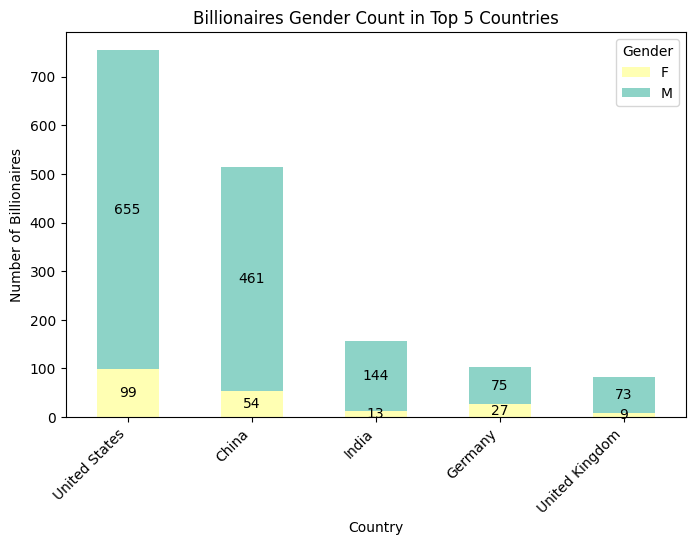

In [349]:
# Extracting Top 5 countries with more billionaires
top5_countries = df_ready['country_of_residence'].value_counts().head(5).index

# Group by country and gender, and count the number of billionaires
gender_dist = df_ready[df_ready['country_of_residence'].isin(top5_countries)].groupby(['country_of_residence', 'gender']).size().unstack()

# Sorting countries by the total number of billionaires
sorted_countries_gender = gender_dist.sum(axis=1).sort_values(ascending=False).index
gender_dist = gender_dist.loc[sorted_countries_gender]

# Defining custom colors
colors = {'F': '#FFFFB3', 'M': '#8DD3C7'}

ax = gender_dist.plot(kind='bar', stacked=True, figsize=(8, 5), color=[colors[col] for col in gender_dist.columns])

# Getting the labels for all columns
for c in ax.containers:
    labels = [f'{v.get_height():.0f}' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fmt='%d')

# Adding elements to make the chart more informative and displaying it
plt.title('Billionaires Gender Count in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()


In [350]:
# Creating two new columns in the gender_dist dataframe to display gender proportions
gender_dist['F_proportion'] = gender_dist['F'] / gender_dist.sum(axis=1)
gender_dist['M_proportion'] = gender_dist['M'] / gender_dist.sum(axis=1)

# Displaying the dataframe with the gender proportions by country and the overall gender proportion
print(f'The billionaire gender distribution in the Top 5 countries is:\n\n{gender_dist}')
print(f'\nThe overall billionaire gender distribution is:\n\n{df_ready["gender"].value_counts(normalize=True)}')

The billionaire gender distribution in the Top 5 countries is:

gender                 F    M  F_proportion  M_proportion
country_of_residence                                     
United States         99  655      0.131300      0.868549
China                 54  461      0.104854      0.894963
India                 13  144      0.082803      0.916714
Germany               27   75      0.264706      0.733391
United Kingdom         9   73      0.109756      0.889054

The overall billionaire gender distribution is:

gender
M    0.875338
F    0.124662
Name: proportion, dtype: float64


**Insights:**

1. In the Top 5 countries, there are much more male billionaires that females regardless of geographic location and economic development.

2. The overall proportion is ~88% males and ~12 females. 4 out of 5 countries in the Top have a similar distribution. The only exception is Germany, whose distribution is the most egalitarian towards females, although it continues to show male dominance by around 3 male billionaires for every female billionaire.

3. The country where female billionaires comprises the lowest percentage in the Top is India, with less than 10%. In absolute terms, there are only 9 female billionaires in the United Kingdom, the lowest number in the Top.

4. In contrast with the above point, the maximum number of both, male and female billionaires can be found in the United States, due to their highest overall number of billionaires.

[Go back to the table of contents](#table-of-contents)

#### Question 7. Box plot to see the distribution of wealth across top 5 countries

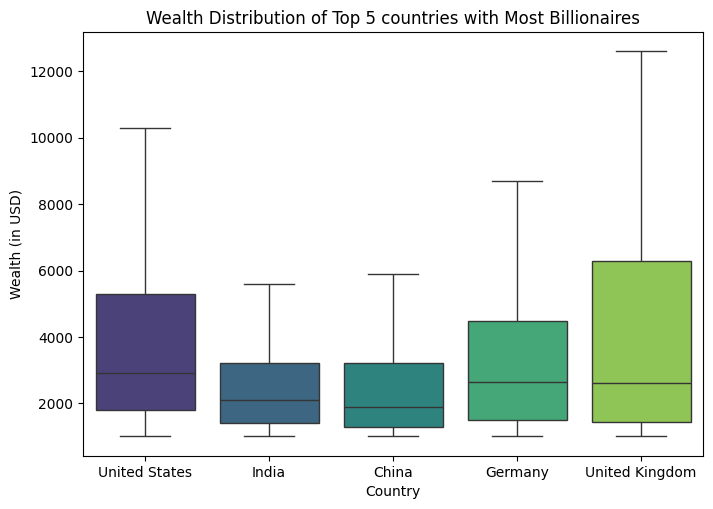

In [351]:
# Creating a box plot using the subset for top5_countries
top5_countries = df_ready['country_of_residence'].value_counts().head(5).index
plt.figure(figsize=(8,5.5))
sns.boxplot(x='country_of_residence', y='wealth', hue='country_of_residence', data=df_ready[df_ready['country_of_residence'].isin(top5_countries)], showfliers=False, palette=sns.color_palette('viridis', n_colors=len(top5_countries)))
plt.title('Wealth Distribution of Top 5 countries with Most Billionaires')
plt.xlabel('Country')
plt.ylabel('Wealth (in USD)')
plt.show()

In [352]:
# Creating a summary to provide further understanding of the values appearing in the boxplot
box_plot_summary = df_ready[df_ready['country_of_residence'].isin(top5_countries)].groupby('country_of_residence')['wealth'].describe()[['25%', '50%', '75%']]

# Renaming the index and columns
box_plot_summary = box_plot_summary.rename_axis(index={'country_of_residence': 'country'})
box_plot_summary.columns = ['Q1 ($B)', 'Median wealth ($B)', 'Q3 ($B)']

# Displaying the summary table
print('Summary table with quantiles and median wealth')
display(box_plot_summary)

Summary table with quantiles and median wealth


,Q1 ($B),Median wealth ($B),Q3 ($B)
country,,,
China,1300.0,1900.0,3200.0
Germany,1500.0,2650.0,4475.0
India,1400.0,2100.0,3200.0
United Kingdom,1425.0,2600.0,6300.0
United States,1800.0,2900.0,5300.0


**Insights:**

1. The maximum values for the first and second quartile are in the United States, while the maximum value for the third quartile is located in the United Kingdom, with the United States in the second place. This suggests that there is a significant range of billionaire wealth in the higher end for these countries as well as the potential presence of outlier values with extremely high net worth.

2. India and China have similar distributions regarding the three metrics. China has a little bigger upper whisker and quartile 3 and a lower median, which indicates the presence of more billionaires in the upper values of the billionaire distribution, that is, a slightly more unequal wealth distribution than India's.

3. Germany's wealth distribution is similar to the United Kindgom in quartiles 1 and 2 but has a much lower value for quartile 3. This suggests a wealth distribution more concentrated around the median, with fewer individuals with extreme wealth and less potential outliers.

#### Question 8. Billionaires age distribution

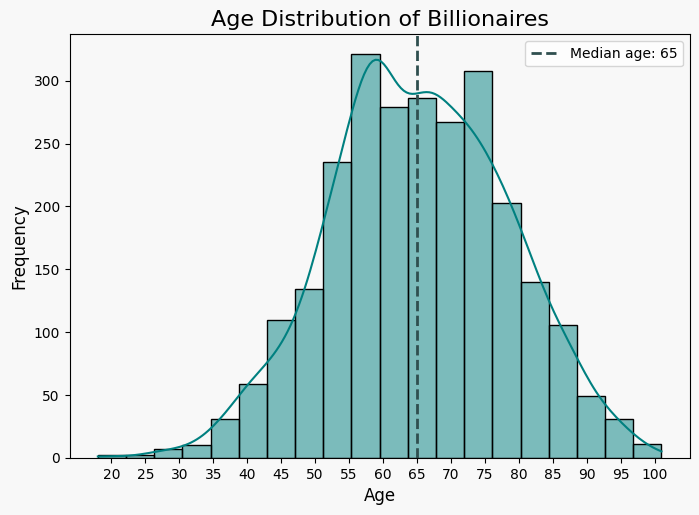

In [353]:
# Setting up the figure size and plotting the histogram of billionaire ages
fig, ax = plt.subplots(figsize=(8, 5.5), facecolor='#F8F8F8')
ax.set_facecolor('#F8F8F8')

sns.histplot(df_ready['age'], bins=20, kde=True, color='teal', edgecolor='black')

# Adding a vertical line for the median age
median_age = df_ready['age'].median()
plt.axvline(median_age, color='darkslategray', linestyle='dashed', linewidth=2, label=f'Median age: {int(median_age)}')


# Adding elements to improve readability and more information to the chart
plt.title('Age Distribution of Billionaires', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(20, 101, 5))
plt.legend()

# Plotting the chart
plt.show()

**Insights:**

1. The most frequent values for billionaire's ages are around 60 years old. This aligns with the values obtained in the Question 5, where 58, 59 and 60 appeared as values with high frequence of billionaires.

2. The histogram also shows a second age peak around 75 years. Diving deeper into this, it's clear there is more frequency for high values than lower ones, which suggests a positive correlation between wealth accumulation and age. If we look at the first and bottom four bins (from 20 to 35 and from 85 to 100), we can see a much higher frequence for these last ones.

3. The two peaks mentioned are almost equally in terms of frequency and the median value of the billionaires is located between them, although more close to 60 years than 75, indicating the prevalence of this age.

#### Question 9. What are the most common birth day, month and year for billionaires?

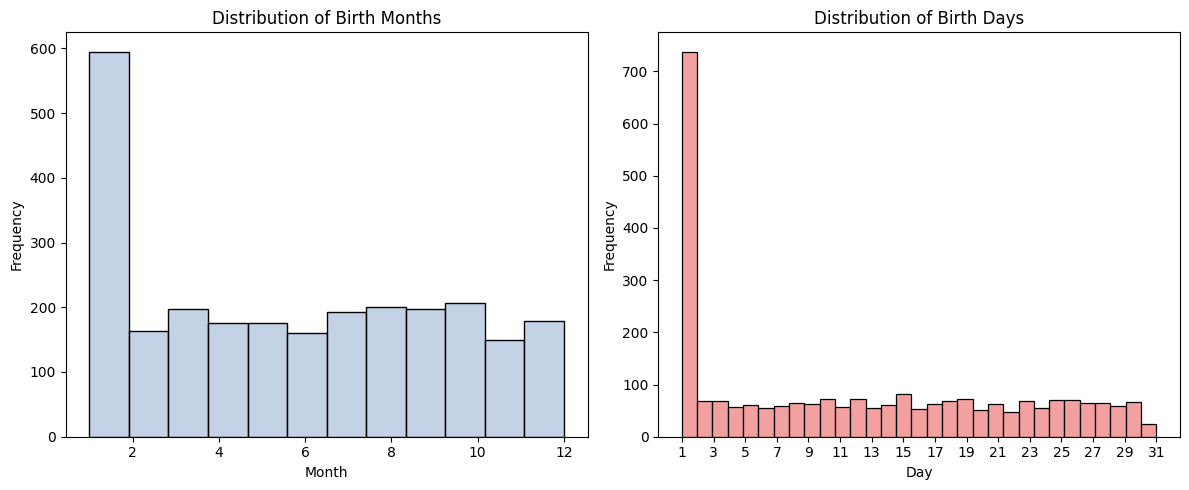

In [354]:
# Setting up the figure and axes
fig, axes = plt.subplots(1,2, figsize=(12,5))

# Plotting the distribution of birth months
sns.histplot(df_ready['birth_month'], bins=12, kde=False, ax=axes[0], color='lightsteelblue')
axes[0].set_title('Distribution of Birth Months')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Frequency')
plt.xticks(range(1, 13, 1))

# Plotting the distribution of birth days
sns.histplot(df_ready['birth_day'], bins=31, kde=False, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of Birth Days')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Frequency')
plt.xticks(range(1, 32, 2))

# Adjusting layout
plt.tight_layout()
plt.show()

**Insights:**

1. Borth charts display a disproportionate frequency for day 1 and January. This could be due to one or all of the following:

   1. There might be a bias in data entry, where the default or missing values are set to January 1st. It's possible that creating the synthetic birth dates using the most frequent values for each country to replace null values could have contributed to exacerbate frequencies for these values.
   2. Some individuals might have chosen to keep their birthdate private. In such cases, a common placeholder for birth date could be January 1st. This is related with the above point.
2. Other than this frequency, the other values follow an even distribution for both variables, with some lows (like november in the birth month plot or 31st in the birth day plot) and highs (like october for months and 15th for days).

#### Question 10. Country pop and number of billionaires. What is the frequency of being a billionaire in the Top 5 countries?

In [355]:
# Calculating the columns of the summary dataset
density_billions = df_ready['country_of_residence'].value_counts().head(5)
billions_number = density_billions
country_pop = df_ready.groupby('country_of_residence')['country_pop'].max()

# Creating and displaying the dataset
q10_df = pd.DataFrame({
    'Country': density_billions.index,
    'Billionaires Count': density_billions.values,
    'Country Population': country_pop.loc[density_billions.index].values,
})

q10_df['Billionaire Density'] = (q10_df['Country Population'] / q10_df['Billionaires Count']).astype(int)
display(q10_df)

,Country,Billionaires Count,Country Population,Billionaire Density
0,United States,754,328239523,435330
1,China,515,1397715000,2714009
2,India,157,1366417754,8703297
3,Germany,102,83132799,815027
4,United Kingdom,82,66834405,815053


In [356]:
q10_df['Sentence'] = [f'In {row["Country"]}, there is one billionaire every {int(row["Billionaire Density"]):,} persons.' for index, row in q10_df.iterrows()]

# Printing the sentences
for sentence in q10_df['Sentence']:
    print(sentence)

In United States, there is one billionaire every 435,330 persons.
In China, there is one billionaire every 2,714,009 persons.
In India, there is one billionaire every 8,703,297 persons.
In Germany, there is one billionaire every 815,027 persons.
In United Kingdom, there is one billionaire every 815,053 persons.


**Insights:**

1. From the summary table and the above sentences, it's clear that the highest density of billionaires can be found in the United States, reflecting a more conductive environment for wealth creation and economic opportunities.
2. Both, Germany and the United Kingdom have almost identical values in this measure.

3. Despite their impressive economic growth in recent decades, China has a lower billionaire density in comparison with advanced economies. This is not only because of its economy, but of how populous the country is as well. This ratio is expected to be reduced in the following years if the Chinese economy continues its development, but it's far from even European Countries right now.

4. India has the lowest billionaire density among the countries in the Top 5, which reflects an economy that has a lot of potential but has only beginning to growth in a consistent way in recent years.

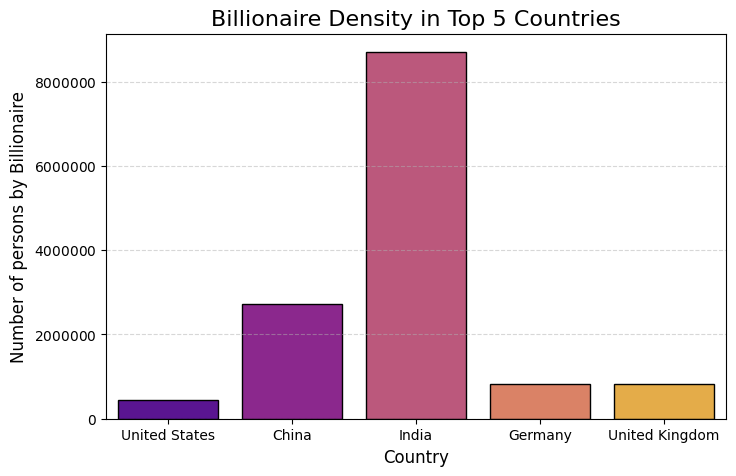

In [357]:
# Creating a bar plot to further understand the billionaire density indicator
plt.figure(figsize=(8,5))
sns.barplot(x='Country', y='Billionaire Density', data=q10_df, hue='Country', edgecolor='black',palette=sns.color_palette('plasma', n_colors=len(q10_df)))

# Adding elements to make the chart more appealing
plt.title('Billionaire Density in Top 5 Countries', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of persons by Billionaire', fontsize=12)
plt.ticklabel_format(style='plain', axis='y', useMathText=True, scilimits=(6,6))

# Displaying the chart
plt.show()

**Note**: Due to how this measure is calculated (total population divided by the number of billionaires in each country), the graph can be misinterpreted with ease. Higher values imply a low presence of billionaires among the overall population. Although the presence of wealthy individuals is not representative of an advanced economy by itself and should be considered in conjunction with other economic indicators, it provides a standardized way to compare how frequent is to find these types of individuals in a particular society and can be considered as a proxy of how wealth a society is.

[Go back to the table of contents](#table-of-contents)

#### Bonus content. Spatial distribution of billionaires across the globe

In [358]:
# Creating a map centered on a location (e.g., world map)
map = flm.Map(location=[0, 0], zoom_start=2, tiles='cartodbpositron')

# Creating a MarkerCluster layer to group markers at the same location
marker_cluster = MarkerCluster().add_to(map)

# Iterating over the dataframe to add markers for each country with billionaires
for index, row in df_ready.iterrows():
    flm.Marker([row['country_lat'], row['country_long']], popup=row['country_of_residence']).add_to(marker_cluster)

# Displaying the map
map


### Advanced EDA. Dimensions section

This section aims to dive deeper into the dataset than the previous one. To accomplish this objective, the data will be observed through the following dimensions.

1. Country
2. Industry
3. Age & Gender

Each one will provide different insights and granularity about billionaires' wealth distribution.

#### Country-based wealth analysis

Using country as dimension, the data will be analyzed in this subsection.

##### Billionaires by total wealth and country

In [359]:
# Creating a new dataframe with number of billionaires and total wealth by country
group_1 = df_ready.groupby('country_of_residence')['wealth'].agg(['count', 'sum']).rename(columns={'count': 'billionaire_count', 'sum': 'total_wealth'}).sort_values(by='total_wealth', ascending=False).rename_axis(index={'country_of_residence': 'country'})

# Calculating percentages over total
group_1['count_perc'] = round((group_1['billionaire_count'] / group_1['billionaire_count'].sum() * 100),2)
group_1['total_wealth_perc'] = round((group_1['total_wealth'] / group_1['total_wealth'].sum() * 100),2)

# Selecting the top 10 countries
top10_1 = group_1.head(10)

# Adding together all other countries not included in the Top 10
other_countries_1 = pd.DataFrame({
    'billionaire_count': [group_1['billionaire_count'].iloc[10:].sum()],
    'total_wealth': [group_1['total_wealth'].iloc[10:].sum()],
    'total_wealth_perc': [group_1['total_wealth_perc'].iloc[10:].sum()],
    'count_perc': [group_1['count_perc'].iloc[10:].sum()]
}, index=['Other Countries'])

group_1_final = pd.concat([top10_1, other_countries_1])

print('Summary table with number of billionaires by country, total wealth and proportions')
group_1_final

Summary table with number of billionaires by country, total wealth and proportions


,billionaire_count,total_wealth,count_perc,total_wealth_perc
United States,754,4575100,29.10,37.84
China,515,1790000,19.88,14.81
India,157,628700,6.06,5.20
France,35,499500,1.35,4.13
Germany,102,462100,3.94,3.82
Switzerland,78,409900,3.01,3.39
United Kingdom,82,370700,3.16,3.07
Russia,79,351000,3.05,2.90
Hong Kong,67,315400,2.59,2.61
Canada,42,173900,1.62,1.44


In [360]:
# Printing statements regarding total wealth accumulation in Top 10 and other countries
print(f'The proportion of total wealth in the top 10 countries other than the US is \033[0;92m{group_1_final["total_wealth_perc"].iloc[1:9].sum()}\033[0m whereas in the US alone is \033[0;94m{group_1_final["total_wealth_perc"].iloc[0]}\033[0m')

print(f'The proportion of total billionaires in the top 10 countries other than the US is \033[0;92m{round(group_1_final["count_perc"].iloc[1:9].sum(),2)}\033[0m whereas in the US alone is \033[0;94m{group_1_final["count_perc"].iloc[0]}\033[0m')



The proportion of total wealth in the top 10 countries other than the US is 39.93 whereas in the US alone is 37.84
The proportion of total billionaires in the top 10 countries other than the US is 43.04 whereas in the US alone is 29.1


In [361]:
# Printing some statements to verify the values in the summary table are equal to the values in the original dataframe
print(f'The total wealth in the original dataframe is {df_ready["wealth"].sum():,.0f} billions')
print(f'The total wealth in the summary table is {group_1_final["total_wealth"].sum():,.0f} billions')


print(f'The number of billionaires presented in the original dataframe is {df_ready.shape[0]:,.0f}')
print(f'The number of billionaires presented in the summary table is {group_1_final["billionaire_count"].sum():,.0f}')

The total wealth in the original dataframe is 12,090,100 billions
The total wealth in the summary table is 12,090,100 billions
The number of billionaires presented in the original dataframe is 2,591
The number of billionaires presented in the summary table is 2,591


**Insights**

- United States billionaires account for 37.84% of the total billionaires' wealth and 29.10% of billionaires' population. In terms of wealth, this is more than 2.5 times the value of China, which follows in the second position with a 14.81%. Regarding population, the difference is ~1.5 times (20.10% vs 19.88%).

- Billionaires wealth distribution shows a clear dominance of US-resident billionaires:
  - Wealth of billionaires who reside in the US is only slightly lower than than billionaires in the other countries in the Top 10 (39.93% vs 37.84%) despite having a significant less proportion of billionaires over the total (43.04% vs 29.10%).

  - If all countries in the Top 10 other than the are excluded, US-based total wealth and billionaire count are greater than all the other countries presented in the dataset combined (whose figures are added under the 'Other Countries' label). That is, there are more billionaires in the US alone than in the rest of the world. The share of US-based billionaires wealth over the total nearly doubles those of the billionaires under the 'Other Countries' label.

##### Mean and median wealth by country

In [362]:
# Creating a new dataframe with billionaire count, total, mean and median wealth by country
group_2 = df_ready.groupby('country_of_residence')['wealth'].agg(['count', 'sum', ('mean', lambda x: round(x.mean(), 2)), 'median']).rename(columns={'count': 'billionaire_count', 'sum': 'total_wealth', 'mean': 'mean_wealth', 'median': 'median_wealth'}).sort_values(by='total_wealth', ascending=False).rename_axis(index={'country_of_residence': 'country'})

# Selecting the top 10 countries
top10_2 = group_2.head(10)

# Summarizing all the other countries not included in the Top 10
other_countries_2 = pd.DataFrame({
    'billionaire_count': [group_2['billionaire_count'].iloc[10:].sum()],
    'total_wealth': [group_2['total_wealth'].iloc[10:].sum()],
    'mean_wealth': round(group_2['mean_wealth'].iloc[10:].mean(),2),
    'median_wealth': round(group_2['median_wealth'].iloc[10:].median(),2)
}, index=['Other Countries'])

group_2_final = pd.concat([top10_2, other_countries_2])

print('Summary table with number of billionaires, total, mean and median wealth')
group_2_final

Summary table with number of billionaires, total, mean and median wealth


,billionaire_count,total_wealth,mean_wealth,median_wealth
United States,754,4575100,6067.77,2900.0
China,515,1790000,3475.73,1900.0
India,157,628700,4004.46,2100.0
France,35,499500,14271.43,4200.0
Germany,102,462100,4530.39,2650.0
Switzerland,78,409900,5255.13,3100.0
United Kingdom,82,370700,4520.73,2600.0
Russia,79,351000,4443.04,2500.0
Hong Kong,67,315400,4707.46,2700.0
Canada,42,173900,4140.48,2200.0


In [363]:
print(f'The maximum mean wealth among the countries is located in \033[0;92m{group_2_final["mean_wealth"].idxmax()}\033[0m with a value of \033[0;92m${group_2_final["mean_wealth"].max():,.0f}\033[0m billions.')

print(f'The maximum median wealth among the countries is located in \033[0;92m{group_2_final["median_wealth"].idxmax()}\033[0m with a value of \033[0;92m${group_2_final["median_wealth"].max():,.0f}\033[0m billions.')

if group_2_final["mean_wealth"].idxmax() == group_2_final["median_wealth"].idxmax():
    print(f'Maximum mean and median wealth values are located in \033[0;92m{group_2_final["mean_wealth"].idxmax()}.\033[0m')
else:
    print(f'Maximum mean and medina wealth values are located in different countries')

print(f'The wealthiest person in the world resides in \033[0;92m{df_ready.iloc[0]["country_of_residence"]}.\033[0m')

The maximum mean wealth among the countries is located in France with a value of $14,271 billions.
The maximum median wealth among the countries is located in France with a value of $4,200 billions.
Maximum mean and median wealth values are located in France.
The wealthiest person in the world resides in France.


**Insights**
- As the previous statements say, mean and median wealth values peaked in France. This is interesting as France is the country with the fewest number of billionaires among the Top 10; however it ranks fourth in terms of total wealth with $500 billion, surpassing Germany, which has nearly three times its number of billionaires, and behind India, a country ~20 times more populous and a proportion of billionaires greater than 5:1 in comparison (157 vs 35).

- The wealthiest person in the world is French. This gives additional context and is congruent with the above statement.

- Mean and median wealth values are far greater (~2 times in most cases) for French billionaires than for any other billionaire in the world, including US-based.

- With all of the above, it's clear that French billionaires are a small but ultra-wealthly group even in comparison with their peers.

#### Industry-based wealth analysis

Using industry as dimension, the data will be analyzed in this subsection.

##### Mean and median wealth by industry

In [364]:

group_4 = df_ready.groupby('category')['wealth'].agg(['count', 'sum', ('mean', lambda x: round(x.mean(), 2)), 'median']).rename(columns={'count': 'billionaire count', 'sum': 'total wealth', 'mean': 'mean wealth', 'median': 'median wealth'}).sort_values(by='total wealth', ascending=False).rename_axis(index={'category': 'industry'})

group_4['mean_times_median'] = round(group_4['mean wealth'] / group_4['median wealth'], 2)

print('Summary table with number of billionaires, total, mean and median wealth by industry')
group_4

Summary table with number of billionaires, total, mean and median wealth by industry


,billionaire count,total wealth,mean wealth,median wealth,mean_times_median
industry,,,,,
Technology,312,1870700,5995.83,2200.0,2.73
Fashion & Retail,261,1675200,6418.39,2500.0,2.57
Finance & Investments,364,1593600,4378.02,2600.0,1.68
Manufacturing,316,1006400,3184.81,2000.0,1.59
Food & Beverage,207,946000,4570.05,2500.0,1.83
Diversified,187,905200,4840.64,2300.0,2.10
Real Estate,191,648800,3396.86,2300.0,1.48
Healthcare,198,638800,3226.26,2100.0,1.54
Automotive,69,516900,7491.30,2600.0,2.88


In [365]:
# Printing statements about the mean and median wealth summary table
print(f'The maximum mean wealth for any industry corresponds to \033[2;37;42m{group_4["mean wealth"].idxmax()}\033[0m with \033[1;32m${group_4["mean wealth"].max():,}\033[0m')

print(f'The maximum median wealth for any industry corresponds to \033[2;37;42m{group_4["median wealth"].idxmax()}\033[0m with \033[1;32m${group_4["median wealth"].max():,}\033[0m')

print(f'The industry where there are more differences between mean and median wealth is \033[2;37;41m{group_4["mean_times_median"].idxmax()}\033[0m with \033[1;31m{group_4["mean_times_median"].max()}')

The maximum mean wealth for any industry corresponds to Automotive with $7,491.3
The maximum median wealth for any industry corresponds to Logistics with $3,200.0
The industry where there are more differences between mean and median wealth is Automotive with 2.88


In [366]:
# Printing statements about the mean and median wealth summary table
print(f'The minimum mean wealth for any industry corresponds to \033[2;37;41m{group_4["mean wealth"].idxmin()}\033[0m with \033[1;31m${group_4["mean wealth"].min():,}\033[0m billions')

print(f'The minimum median wealth for any industry corresponds to \033[2;37;41m{group_4["median wealth"].idxmin()}\033[0m with \033[1;31m${group_4["median wealth"].min():,}\033[0m billions')

print(f'The industry where there are less differences between mean and median wealth is \033[2;37;42m{group_4["mean_times_median"].idxmin()}\033[0m with \033[1;32m{group_4["mean_times_median"].min()}')

The minimum mean wealth for any industry corresponds to Construction & Engineering with $2,647.62 billions
The minimum median wealth for any industry corresponds to Manufacturing with $2,000.0 billions
The industry where there are less differences between mean and median wealth is Service with 1.26


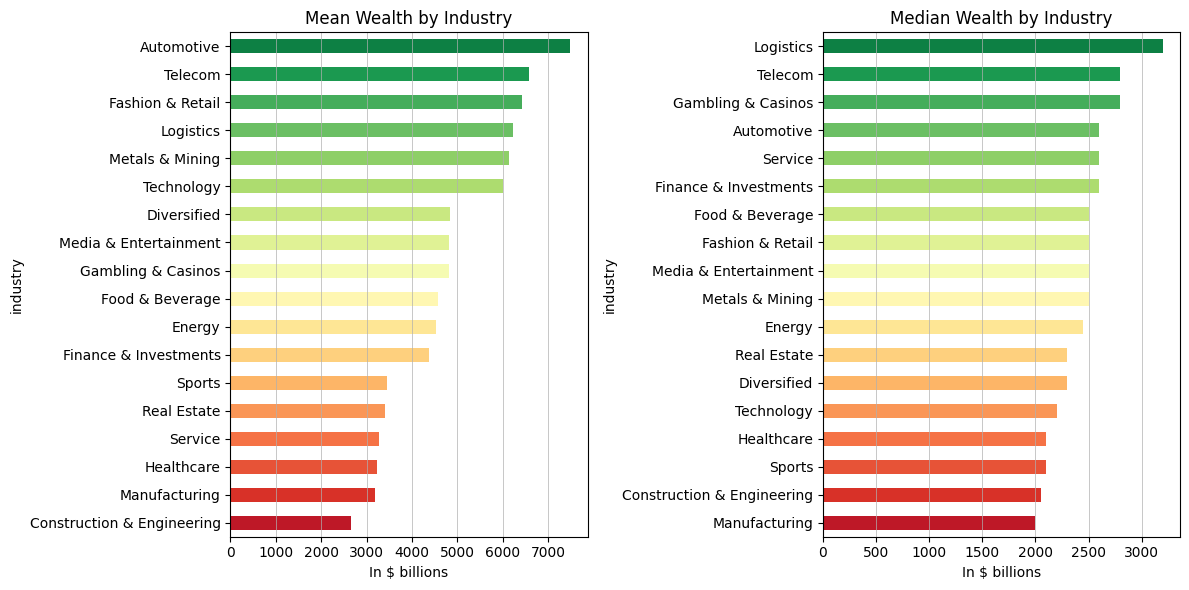

In [367]:
# Creating subplots
fig, axes = plt.subplots(1,2, figsize=(12,6))

# Plotting mean wealth
group_4['mean wealth'].sort_values(ascending=True).plot(kind='barh', ax=axes[0], color=sns.color_palette('RdYlGn', len(group_4)))
axes[0].set_title('Mean Wealth by Industry')
axes[0].set_xlabel('In $ billions')
axes[0].xaxis.grid(True, linestyle='-', linewidth=0.5)
axes[0].yaxis.grid(False)

# Plotting median wealth
group_4['median wealth'].sort_values(ascending=True).plot(kind='barh', ax=axes[1], color=sns.color_palette('RdYlGn', len(group_4)))
axes[1].set_title('Median Wealth by Industry')
axes[1].set_xlabel('In $ billions')
axes[1].xaxis.grid(True, linestyle='-', linewidth=0.5)
axes[1].yaxis.grid(False)

# Adjusting layout
plt.tight_layout()

# Displaying the plots
plt.show()

**Insights**

1. Mean wealth values for the different industries have a higher range that median values. The difference between the maximum and minimum value for means is near $5,000 billions, whereas for medians, the difference is a little over $1,000 billions.

2. Telecom industry has a relative small amount of billionaires, but they rank in the second place in both indicators. Another industry with similar features is Logistics, the only group with a median wealth above $3,000 billions.

3. Biggest industries in terms of size perform in different ways:

   1. Billionaires in the Finance & Investments industry performs better in median wealth, suggesting the absence of extreme values in the distribution.
   2. Despite having the third largest number of billionaires, the Manufacturing industry ranks at the bottom in terms of both, mean and median wealth.
   3. Although not as extreme as the Manufacturing industry, a similar situation can be found in the Technology and Fashion & Retail industries, which perform better in mean than median wealth.

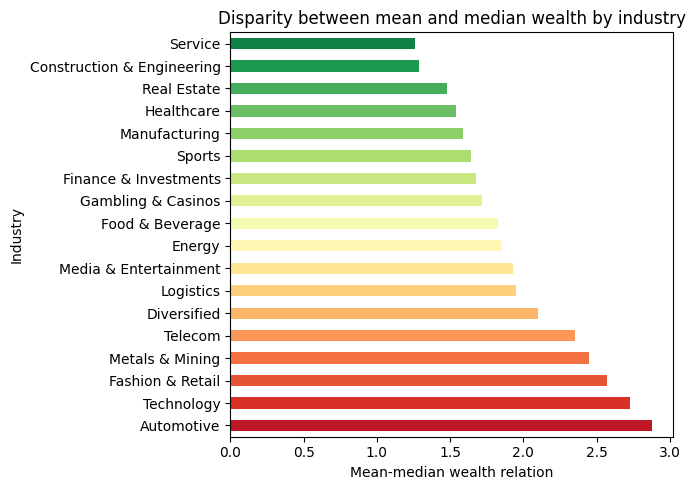

In [368]:
# Plotting how many times mean overrun median by industry
plt.figure(figsize=(7, 5))
group_4['mean_times_median'].sort_values(ascending=False).plot(kind='barh', color=sns.color_palette('RdYlGn', len(group_4)))

# Adding elements to the plot
plt.xlabel('Mean-median wealth relation')
plt.ylabel('Industry')
plt.title('Disparity between mean and median wealth by industry')
plt.grid(False, axis='y')

# Displaying the plot
plt.tight_layout()
plt.show()

**Insights**

1. Higher values suggest the presence of individuals with ultra high net worth, whereas lower values indicate the majority of the distribution for an industry is concentrated around the median wealth.

2. Automotive, Technology and Fashion & Retail industries have the highest differences in mean-median wealth relation, which suggests the presence of a small, ultra-wealth group of individuals that rise the overall mean of their respective groups.

3. In contrast, Services, Construction & Engineering and Real Estate industries have the lowest differences between mean and median wealth (all of them below 1.5).

4. In general, the higher this value, the more probable is that an industry ranks better in terms of mean wealth than median wealth. This is the case for Technology, where the difference is high and the industry ranks better among other industries in terms of mean wealth than median wealth. Finance & Investments industry is an opposite case: it ranks better in median wealth, and its difference ratio is on the low side.

##### Treemap of wealth generation industries

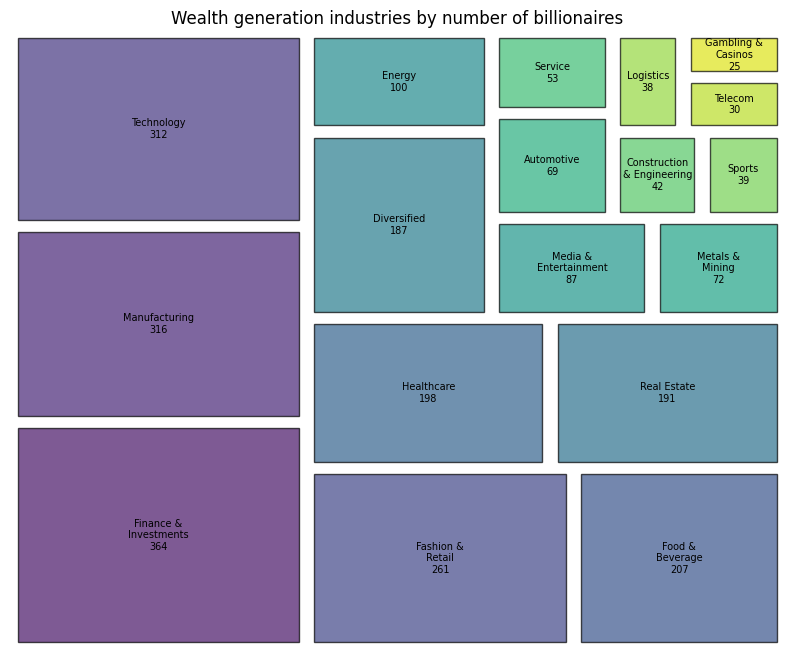

In [369]:
# Creating a summary of industries and counts to display in the treemap
cat_count = df_ready.groupby('category').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
sizes = cat_count.counts
labels = [f'{textwrap.fill(category, width=13)}\n{counts}' for category, counts in zip(cat_count.category, sizes)]


# Plotting the treemap with wrapped text
plt.figure(figsize=(10, 8))
sq.plot(sizes=sizes, label=labels, color=sns.color_palette('viridis', len(sizes)), alpha=0.7, text_kwargs={'fontsize': 7}, pad=1, ec='black')
plt.axis('off')

# Displaying the plot
plt.title('Wealth generation industries by number of billionaires')
plt.show()

##### Industry categorization

A categorization of industries can be a useful proxy variable of how profitable a industry is based on the differences in relative weights of number of billionaires and wealth accumulation over their respective totals. In this particular case, the defined categories will be as follows:

- $(\text{total wealth proportion} - \text{number of billionaires in this category}) >= 2$ ➡️ High profitability.
- $1 <= (\text{total wealth proportion} - \text{number of billionaires in this category}) < 2$, ➡️ Avg-high profitabiliy.
- $-1 <= (\text{total wealth proportion} - \text{number of billionaires in this category}) < 1$ ➡️ Avg profitabiliy.
- $-1 < (\text{total wealth proportion} - \text{number of billionaires in this category}) < -2$ ➡️ Avg-low profitabiliy.
- $(\text{total wealth proportion} - \text{number of billionaires in this category}) <= -2$ ➡️ Low profitabiliy.

In [370]:
# Creating a new dataframe with number of billionaires and total wealth by industry
group_3 = df_ready.groupby('category')['wealth'].agg(['count', 'sum']).rename(columns={'count': 'billionaire_count', 'sum': 'total_wealth'}).sort_values(by='total_wealth', ascending=False).rename_axis(index={'category': 'industry'})

# Calculating percentages over total
group_3['cat_perc'] = round((group_3['billionaire_count'] / group_3['billionaire_count'].sum() * 100),2)
group_3['total_wealth_perc'] = round((group_3['total_wealth'] / group_3['total_wealth'].sum() * 100),2)

# Creating a categorization for the proportions' differences between category and total wealth accumulation

# Defining categories
ind_cat_cond = [
    (group_3['total_wealth_perc'] - group_3['cat_perc'] >= 2),
    (group_3['total_wealth_perc'] - group_3['cat_perc'] < 2) & (group_3['total_wealth_perc'] - group_3['cat_perc'] >= 1),
    (group_3['total_wealth_perc'] - group_3['cat_perc'] < 1) & (group_3['total_wealth_perc'] - group_3['cat_perc'] >= -1),
    (group_3['total_wealth_perc'] - group_3['cat_perc'] < -1) & (group_3['total_wealth_perc'] - group_3['cat_perc'] > -2),
    (group_3['total_wealth_perc'] - group_3['cat_perc'] <= -2)
]

# Defining values to be displayed and column creation
ind_values = ['high profitability', 'avg-high profitability', 'avg. profitability', 'avg-low profitability', 'low profitability']

group_3['ind_tier'] = np.select(ind_cat_cond, ind_values)

print('Summary table with number of billionaires by industry, total wealth, proportions and industry categorization')
group_3

Summary table with number of billionaires by industry, total wealth, proportions and industry categorization


,billionaire_count,total_wealth,cat_perc,total_wealth_perc,ind_tier
industry,,,,,
Technology,312,1870700,12.04,15.47,high profitability
Fashion & Retail,261,1675200,10.07,13.86,high profitability
Finance & Investments,364,1593600,14.05,13.18,avg. profitability
Manufacturing,316,1006400,12.20,8.32,low profitability
Food & Beverage,207,946000,7.99,7.82,avg. profitability
Diversified,187,905200,7.22,7.49,avg. profitability
Real Estate,191,648800,7.37,5.37,low profitability
Healthcare,198,638800,7.64,5.28,low profitability
Automotive,69,516900,2.66,4.28,avg-high profitability


In [371]:
# Printing statements regarding industry wealth accumulation
print(f'{(group_3["total_wealth"] >= 1000000).sum()} out of {len(group_3)} industries have a combined total wealth greater than 1,000 billions')

print(f'{(group_3["total_wealth"] >= 500000).sum()} out of {len(group_3)} industries have a combined total wealth greater than 500 billions')

print(f'{(group_3["total_wealth"] >= 250000).sum()} out of {len(group_3)} industries have a combined total wealth greater than 250 billions')

if (group_3["total_wealth"] > 100000).sum() == len(group_3):
    print('All industries have a combined wealth greater than 100 billion')
else:
    print('There are industries with a combined wealth lower than 100 billion')


4 out of 18 industries have a combined total wealth greater than 1,000 billions
9 out of 18 industries have a combined total wealth greater than 500 billions
12 out of 18 industries have a combined total wealth greater than 250 billions
All industries have a combined wealth greater than 100 billion


In [372]:
# Printing statements regarding industry profitability
for value, count in group_3['ind_tier'].value_counts().sort_values(ascending=False).items():
    if count == 1:
        print(f'Out of {len(group_3)} industries, {count} is {value} industry')
    else:
        print(f'Out of {len(group_3)} industries, {count} are {value} industries')

Out of 18 industries, 12 are avg. profitability industries
Out of 18 industries, 3 are low profitability industries
Out of 18 industries, 2 are high profitability industries
Out of 18 industries, 1 is avg-high profitability industry


In [373]:
# Printing statements related to industry wealth building potential
print(f'There are {(group_3["total_wealth_perc"] > group_3["cat_perc"]).sum()} industries with\033[1;32m more favorable conditions\033[0m to accumulate wealth. These are:\n')
pprint.pprint(group_3[group_3["total_wealth_perc"] > group_3["cat_perc"]].index.tolist())

print(f'\nThere are {(group_3["total_wealth_perc"] < group_3["cat_perc"]).sum()} industries with\033[1;31m less favorable conditions\033[0m to accumulate wealth. These are:\n')
pprint.pprint(group_3[group_3["total_wealth_perc"] < group_3["cat_perc"]].index.tolist())

There are 9 industries with more favorable conditions to accumulate wealth. These are:

['Technology',
 'Fashion & Retail',
 'Diversified',
 'Automotive',
 'Metals & Mining',
 'Media & Entertainment',
 'Logistics',
 'Telecom',
 'Gambling & Casinos']

There are 9 industries with less favorable conditions to accumulate wealth. These are:

['Finance & Investments',
 'Manufacturing',
 'Food & Beverage',
 'Real Estate',
 'Healthcare',
 'Energy',
 'Service',
 'Sports',
 'Construction & Engineering']


**Insights**
- Technology is the industry with the highest total wealth among all categories. It also ranks high in total number of billionaires (third, only behind Finance & Investments and Manufacturing).

- All industries have a combined wealth over $100 billions. Half of them have a combined wealth over $500 billions and 4 surpasses 1,000 billions. These last ones are also the industries with more billionaires overall.

- The industries are evenly split between those with more favorable conditions to accumulate wealth and those where individuals who operate in them have more difficulties to accumulate wealth.



##### Biggest and wealthiest groups by industry

In [374]:
# Grouping by category and country_of_residence to find the count of billionaires in each combination
group_7a = df_ready.groupby(['category', 'country_of_residence']).size().reset_index(name='group_size').rename(columns={'country_of_residence': 'top_country_by_size'})

# Finding the maximum count of billionaires for each industry
max_counts = group_7a.groupby('category')['group_size'].max().reset_index()

# Merging the two sets to identify the rows with the highest count of billionaires for each industry
group_7a = pd.merge(group_7a, max_counts, on=['category', 'group_size'], how='inner')

# Defining a function to calculate the sum of wealth for each category-country pair
def calculate_wealth_sum(category, country):
    return df_ready[(df_ready['category'] == category) & (df_ready['country_of_residence'] == country)]['wealth'].sum()

# Applying the function to each row in the group_7 DataFrame and store the results in a new column
group_7a['group_size_wealth'] = group_7a.apply(lambda row: calculate_wealth_sum(row['category'], row['top_country_by_size']), axis=1)

# Adding extra columns for billionaire size
group_7a['b_count'] = df_ready.groupby('category')['wealth'].agg('count').reset_index()['wealth']
group_7a['industry_wealth'] = df_ready.groupby('category')['wealth'].agg('sum').reset_index()['wealth']

# Grouping by category and country_of_residence to find the sum of wealth and count of billionaires for each combination
group_wealth_count = df_ready.groupby(['category', 'country_of_residence']).agg({'wealth': ['sum', 'size']}).reset_index()
group_wealth_count.columns = ['category', 'country_of_residence', 'total_wealth', 'group_size']

# Finding the maximum wealth for each industry
max_wealth = group_wealth_count.groupby('category')['total_wealth'].max().reset_index()

group_7a = pd.merge(group_7a, max_wealth, on=['category'], how='inner')
group_7a = pd.merge(group_7a, group_wealth_count, on=['category', 'total_wealth'], how='inner')
group_7a.columns = ['industry', 'top_country_by_size', 'group_size', 'group_size_wealth', 'b_count', 'industry_wealth', 'wealthiest_group_wealth', 'top_country_by_wealth', 'wealth_group_size']

# Rearranging the columns
group_7a = group_7a.reindex(columns=['industry', 'top_country_by_size', 'group_size', 'group_size_wealth', 'b_count', 'industry_wealth', 'top_country_by_wealth', 'wealth_group_size','wealthiest_group_wealth'])

# Creating another column to see if the biggest and wealthiest group of billionaires are located in the same country

group_7a['matching_country'] = np.where(group_7a['top_country_by_size'] == group_7a['top_country_by_wealth'], 'yes', 'no')

group_7a

,industry,top_country_by_size,group_size,group_size_wealth,b_count,industry_wealth,top_country_by_wealth,wealth_group_size,wealthiest_group_wealth,matching_country
0,Automotive,China,20,152200,69,516900,United States,12,225900,no
1,Construction & Engineering,United States,5,20900,42,111200,United States,5,20900,yes
2,Diversified,India,22,201900,187,905200,India,22,201900,yes
3,Energy,United States,35,160300,100,453500,United States,35,160300,yes
4,Fashion & Retail,United States,63,557600,261,1675200,United States,63,557600,yes
5,Finance & Investments,United States,190,1003500,364,1593600,United States,190,1003500,yes
6,Food & Beverage,United States,74,336300,207,946000,United States,74,336300,yes
7,Gambling & Casinos,United States,6,49500,25,120500,United States,6,49500,yes
8,Healthcare,China,70,208500,198,638800,China,70,208500,yes
9,Logistics,China,7,17000,38,236800,Switzerland,4,102800,no


In [390]:
print(f'The countries with the\033[1;32m biggest billionaire group \033[0mper industry are as follows:\n\n{group_7a["top_country_by_size"].value_counts()}')
print(f'\nThe countries with the\033[1;32m wealthiest billionaire group\033[0m per industry are as follows:\n\n{group_7a["top_country_by_wealth"].value_counts()}')
print(f'\nThere are {len(group_7a[group_7a["matching_country"] == "yes"])} industries in which the biggest group of billionaires is also the wealthiest')
print(f'\nThe industries where the biggest group of billionaires is not the wealthiest one are the following:\n\n {", ".join(group_7a[group_7a["matching_country"] == "no"]["industry"].tolist())}')

The countries with the biggest billionaire group per industry are as follows:

top_country_by_size
United States    12
China             4
India             1
Russia            1
Name: count, dtype: int64

The countries with the wealthiest billionaire group per industry are as follows:

top_country_by_wealth
United States    12
China             2
India             1
Switzerland       1
Russia            1
Mexico            1
Name: count, dtype: int64

There are 15 industries in which the biggest group of billionaires is also the wealthiest

The industries where the biggest group of billionaires is not the wealthiest one are the following:

 Automotive, Logistics, Telecom


In [ ]:
group_7b = group_7a.copy()

# Adding columns with proportions

group_7b['group_size_p'] = round((group_7b['group_size'] / group_7b['b_count']*100),2)
group_7b['group_size_wealth_p'] = round((group_7b['group_size_wealth'] / group_7b['industry_wealth']*100),2)

group_7b['w_group_size_p'] = round((group_7b['wealth_group_size'] / group_7b['b_count']*100),2)
group_7b['w_group_size_wealth_p'] = round((group_7b['wealthiest_group_wealth'] / group_7b['industry_wealth']*100),2)

group_7b

,industry,top_country_by_size,group_size,group_size_wealth,b_count,industry_wealth,top_country_by_wealth,wealth_group_size,wealthiest_group_wealth,matching_country,group_size_p,group_size_wealth_p,w_group_size_p,w_group_size_wealth_p
0,Automotive,China,20,152200,69,516900,United States,12,225900,no,28.99,29.44,17.39,43.70
1,Construction & Engineering,United States,5,20900,42,111200,United States,5,20900,yes,11.90,18.79,11.90,18.79
2,Diversified,India,22,201900,187,905200,India,22,201900,yes,11.76,22.30,11.76,22.30
3,Energy,United States,35,160300,100,453500,United States,35,160300,yes,35.00,35.35,35.00,35.35
4,Fashion & Retail,United States,63,557600,261,1675200,United States,63,557600,yes,24.14,33.29,24.14,33.29
5,Finance & Investments,United States,190,1003500,364,1593600,United States,190,1003500,yes,52.20,62.97,52.20,62.97
6,Food & Beverage,United States,74,336300,207,946000,United States,74,336300,yes,35.75,35.55,35.75,35.55
7,Gambling & Casinos,United States,6,49500,25,120500,United States,6,49500,yes,24.00,41.08,24.00,41.08
8,Healthcare,China,70,208500,198,638800,China,70,208500,yes,35.35,32.64,35.35,32.64
9,Logistics,China,7,17000,38,236800,Switzerland,4,102800,no,18.42,7.18,10.53,43.41


In [ ]:
group_7c = group_7b[['industry', 'top_country_by_size', 'group_size_p', 'group_size_wealth_p', 'top_country_by_wealth', 'w_group_size_p', 'w_group_size_wealth_p']]
group_7c

,industry,top_country_by_size,group_size_p,group_size_wealth_p,top_country_by_wealth,w_group_size_p,w_group_size_wealth_p
0,Automotive,China,28.99,29.44,United States,17.39,43.70
1,Construction & Engineering,United States,11.90,18.79,United States,11.90,18.79
2,Diversified,India,11.76,22.30,India,11.76,22.30
3,Energy,United States,35.00,35.35,United States,35.00,35.35
4,Fashion & Retail,United States,24.14,33.29,United States,24.14,33.29
5,Finance & Investments,United States,52.20,62.97,United States,52.20,62.97
6,Food & Beverage,United States,35.75,35.55,United States,35.75,35.55
7,Gambling & Casinos,United States,24.00,41.08,United States,24.00,41.08
8,Healthcare,China,35.35,32.64,China,35.35,32.64
9,Logistics,China,18.42,7.18,Switzerland,10.53,43.41


In [395]:
print(f'The industry with the highest concentration of billionaires in a single country is\033[38;2;25;109;145m {group_7b.loc[group_7b["group_size_p"].idxmax(), "industry"]}.\033[0m')
print(f'The country is {group_7b.loc[group_7b["group_size_p"].idxmax(), "top_country_by_size"]} and the \033[38;2;25;109;145mproportion of total billionaires\033[0m in this sector that live here is \033[38;2;25;109;145m{group_7b["group_size_p"].max()}%\033[0m')
print(f'This billionaire group accounts for \033[38;2;25;109;145m{group_7b["group_size_wealth_p"].max()}% \033[0mof the industry\'s total wealth')


print(f'\nThe industry with the lowest concentration of billionaires in a single country is \033[38;2;143;196;218m{group_7b.loc[group_7b["group_size_p"].idxmin(), "industry"]}.\033[0m')
print(f'The country is {group_7b.loc[group_7b["group_size_p"].idxmin(), "top_country_by_size"]} and the \033[38;2;143;196;218mproportion of total billionaires\033[0m in this sector that live here is {group_7b["group_size_p"].min()}%')

print(f'This billionaire group accounts for \033[38;2;143;196;218m{group_7b.loc[group_7b["group_size_p"].idxmin(), "group_size_wealth_p"]}%\033[0m of the industry\'s total wealth')


The industry with the highest concentration of billionaires in a single country is Sports.
The country is United States and the proportion of total billionaires in this sector that live here is 89.74%
This billionaire group accounts for 94.8% of the industry's total wealth

The industry with the lowest concentration of billionaires in a single country is Diversified.
The country is India and the proportion of total billionaires in this sector that live here is 11.76%
This billionaire group accounts for 22.3% of the industry's total wealth


##### Billionaires presence by industry and country

In [104]:
# Creating a summary table to find the number of industries in which each country has billionaires
group_5 = df_ready.groupby('country_of_residence')['category'].nunique().reset_index().rename(columns={'country_of_residence': 'country', 'category': 'ind_number'}).assign(max_number_ind=df_ready['category'].nunique()).sort_values(by='ind_number', ascending=False).reset_index(drop=True)

# Creating a column to calculate industry presence of billionaires in each country
print('Summary table with the number of industries in which each country has billionaires and overall presence')
group_5['industry_presence'] = round(group_5['ind_number'] / group_5['max_number_ind'], 2)
group_5



Summary table with the number of industries in which each country has billionaires and overall presence


,country,ind_number,max_number_ind,industry_presence
0,United States,18,18,1.00
1,Switzerland,17,18,0.94
2,China,16,18,0.89
3,United Kingdom,16,18,0.89
4,India,15,18,0.83
...,...,...,...,...
73,Andorra,1,18,0.06
74,Liechtenstein,1,18,0.06
75,Luxembourg,1,18,0.06
76,Nepal,1,18,0.06


In [240]:
# Printing meaningful sentences about the billionaires' industry presence in each country
print(f'There are {df_ready["category"].nunique()} different types of industries\n')
print(f'The following countries have billionaires present in \033[38;2;25;109;145mall industries: \033[0m{group_5[group_5["ind_number"] == group_5["max_number_ind"]]["country"].to_string(index=False)}\n')

print(f'There are {(group_5["industry_presence"] > 0.75).sum()} countries with billionaires in \033[38;2;32;137;182mat least 75% of industries.\033[0m \nThese are: {", ".join(group_5[group_5["industry_presence"] > 0.75]["country"].tolist())}')

print(f'\nAfter the first ones, there are {((group_5["industry_presence"] < 0.75) & (group_5["industry_presence"] > 0.5)).sum()} countries and territories with billionaires in\033[38;2;143;196;218m more than 50% of industries.\033[0m \n{", ".join(group_5[(group_5["industry_presence"] < 0.75) & (group_5["industry_presence"] > 0.5)]["country"].tolist())}')

There are 18 different types of industries

The following countries have billionaires present in all industries: United States

There are 6 countries with billionaires in at least 75% of industries. 
These are: United States, Switzerland, China, United Kingdom, India, Russia

After the first ones, there are 11 countries and territories with billionaires in more than 50% of industries. 
Hong Kong, France, Singapore, Australia, Israel, Germany, Italy, Japan, Canada, United Arab Emirates, Indonesia


In [106]:
# Finding billionaires' industry presence in the Top 5 countries
group_5[group_5['country'].isin(top5_countries)]

,country,ind_number,max_number_ind,industry_presence
0,United States,18,18,1.00
2,China,16,18,0.89
3,United Kingdom,16,18,0.89
4,India,15,18,0.83
11,Germany,12,18,0.67


In [107]:
# Grouping the data by the number of industries each country has billionaires in and count the result
countries_per_cat = group_5.groupby('ind_number').size().reset_index(name='country_count').sort_values(by='ind_number', ascending=True)
countries_per_cat.reset_index(drop=True)

# Calculating the percentage of countries in each group and cumulative percentage
countries_per_cat['country_perc'] = round((countries_per_cat['country_count'] / countries_per_cat['country_count'].sum())*100,2)
countries_per_cat['cumul_perc'] = countries_per_cat['country_perc'].cumsum()
countries_per_cat.loc[countries_per_cat.index[-1], 'cumul_perc'] = 100.00

# Displaying the result
countries_per_cat

,ind_number,country_count,country_perc,cumul_perc
0,1,22,28.21,28.21
1,2,11,14.10,42.31
2,3,6,7.69,50.00
3,4,6,7.69,57.69
4,5,3,3.85,61.54
5,6,2,2.56,64.10
6,8,4,5.13,69.23
7,9,7,8.97,78.20
8,10,1,1.28,79.48
9,11,1,1.28,80.76


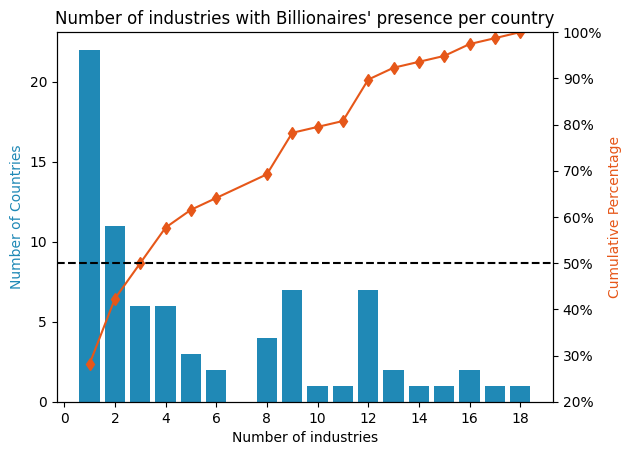

In [108]:
# Plotting the bar chart
fig, ax1 = plt.subplots()

ax1.bar(countries_per_cat['ind_number'].astype('int64'), countries_per_cat['country_count'], color='#2089b6')
ax1.set_xlabel('Number of industries')
ax1.set_ylabel('Number of Countries', color='#2089b6')

# Creating a secondary y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(countries_per_cat['ind_number'].astype('int64'), countries_per_cat['cumul_perc'], color='#e65719', marker='d')
ax2.set_ylabel('Cumulative Percentage', color='#e65719')
ax2.axhline(50, color="#000000", linestyle="dashed")
ax2.yaxis.set_major_formatter(tk.PercentFormatter())

# Removing gridlines
ax1.grid(False)
ax2.grid(False)

# Setting the starting point of the y-axis to 20
ax2.set_ylim(20, 100)

# Setting the step size of the x-axis to 1
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Adding a title
plt.title(f'Number of industries with Billionaires\' presence per country')

# Showing the plot
plt.show()


**Insights:**

1. Most of the countries listed in the data only have billionaires in one industry.

2. Countries with billionaires in three or less industries account for the 50% of the distribution. In other words, half of the countries presented in the dataset have billionaires in three or less different industries.

3. In general, the higher the number of different industries, the lower the number of countries with billionaires in all of them. There are two exceptions: 9 and 12, with counts more aligned with lower number of different industry values.

4. When looking at the Top 5 countries with most billionaires, apart from the United States, which has billionaires in all industries, China and United Kingdom follows with presence in 16 industries and India with 15. Germany is the country with fewer diversification across industries with 12 out of 18.

#### Age & gender analysis

Using both, age and gender as dimensions, the data will be analyzed in this subsection.

In [115]:
# Creating summary table with billionaires' mean and median age by continent and gender
group_6 = df_ready.groupby(['continent', 'gender'])['age'].agg([('mean', lambda x: round(x.mean(), 2)), 'median']).reset_index().rename(columns={'mean': 'mean_age', 'median': 'median_age'})


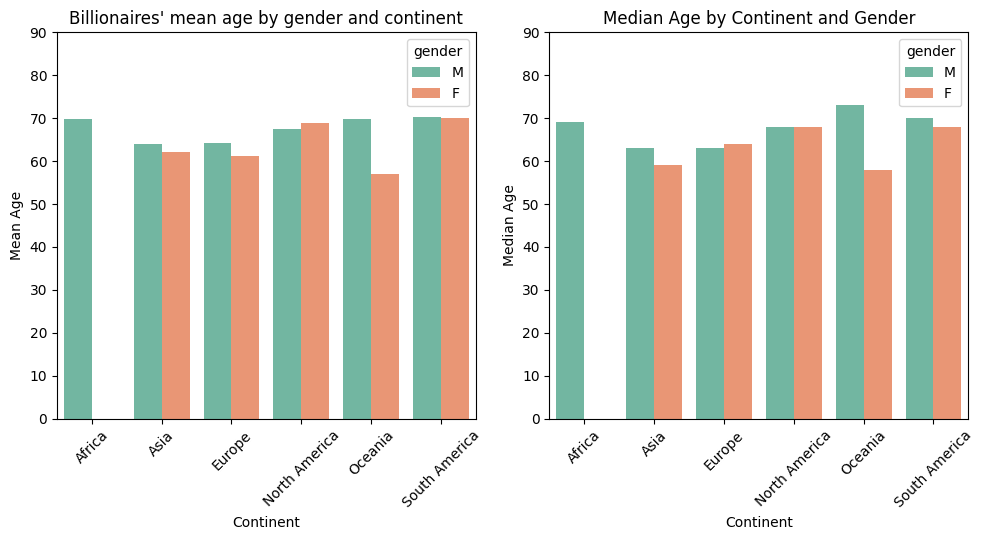

In [116]:
# Creating the figure and axes
fig, axes = plt.subplots(1,2, figsize=(10,5.5))

# Plotting mean age
sns.barplot(data=group_6, x='continent', y='mean_age', hue='gender', ax=axes[0], palette='Set2')
axes[0].set_xlabel('Continent')
axes[0].set_ylabel('Mean Age')
axes[0].set_title(f'Billionaires\' mean age by gender and continent')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0,90)

# Plotting median age
sns.barplot(data=group_6, x='continent', y='median_age', hue='gender', ax=axes[1], palette='Set2')
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Median Age')
axes[1].set_title('Median Age by Continent and Gender')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0,90)

# Adjusting the layout
plt.tight_layout()

# Showing the plot
plt.show()

In [117]:
# Printing the summary table with billionaires' mean and median age by selected categories
print(f'Summary table with billionaires\' mean and median age by continent and gender')
group_6

Summary table with billionaires' mean and median age by continent and gender


,continent,gender,mean_age,median_age
0,Africa,M,69.76,69.0
1,Asia,F,62.14,59.0
2,Asia,M,64.06,63.0
3,Europe,F,61.17,64.0
4,Europe,M,64.14,63.0
5,North America,F,68.91,68.0
6,North America,M,67.48,68.0
7,Oceania,F,56.89,58.0
8,Oceania,M,69.75,73.0
9,South America,F,70.00,68.0


**Insights**

- Africa is the only continent with no female billionaires.

- Mean age for female billionaires is lower than its male counterparts in every continent except in North America. This age difference is minimum at 0.24 years in South America and maximum at 12.86 in Oceania.

- Oceania's female billionaires are the only category in this group with a mean (and median) age lower than 60. Asia's female billionaires also have a median age lower than 60.

- North America's billionaires median age is the same, regardless of gender. Is the only continent where this condition is met.

-  South America's billionaires are the oldest ones if mean age is considered. However, if median age is used as a measure, the oldest billionaires are males who live in Oceania, with a value of 73.

### Country dashboard

In [118]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initializing the Dash app

app = dash.Dash(__name__)

# Define function to calculate metrics based on selected country
def calculate_metrics(selected_country):
    # Filter data for the selected country
    filtered_data = df_ready[df_ready['country_of_residence'] == selected_country]
    
    # Calculate total number of billionaires in selected country
    total_billionaires = len(filtered_data)
    
    # Calculate total wealth accumulated by billionaires in selected country
    total_wealth = filtered_data['wealth'].sum()

    # Calculate mean wealth accumulated by billionaires in selected country
    mean_wealth = filtered_data['wealth'].mean()

    # Calculate median wealth accumulated by billionaires in selected country
    median_wealth = filtered_data['wealth'].median()
    
    # Calculate percentage of total number of billionaires in the country over the total presented in the dataset
    total_billionaires_percentage = (total_billionaires / len(df_ready)) * 100
    
    # Calculate percentage of total wealth in the selected country over the total presented in the dataset
    total_wealth_percentage = (total_wealth / df_ready['wealth'].sum()) * 100
    
    return total_billionaires, total_wealth, mean_wealth, median_wealth, total_billionaires_percentage, total_wealth_percentage

# Defining the layout of the app
app.layout = html.Div(style={'backgroundColor': '#fff'}, children=[
    html.H1(children='Billionaires Dashboard'),
    
    # Dropdown menu to select country
    dcc.Dropdown(
        id='country_dropdown',
        options=[{'label': country, 'value': country} for country in df_ready.groupby('country_of_residence').size().sort_values(ascending=False).index],
        value=df_ready['country_of_residence'].unique()[0]
    ),
    
# KPI cards section
html.Div(children=[
    html.H2('KPIs section'),
    # Pair 1: Number of billionaires and Wealth Accumulated
    html.Div(children=[
        html.Div(children=[
            html.H3("Number of billionaires in the country"),
            html.H3(id="total_billionaires")
        ], className='six columns', style={'width': '48%', 'display': 'inline-block', 'background-color': '#9AE735', 'border': '1px solid black', 'padding': '5px'}),
        
        html.Div(children=[
            html.H3("Wealth Accumulated (in $ billions)"),
            html.H3(id="total_wealth")
        ], className='six columns', style={'width': '48%', 'display': 'inline-block', 'background-color': '#9AE735', 'border': '1px solid black', 'padding': '5px'}),
    ], className='row'),

    # Pair 2: Mean and median wealth
    html.Div(children=[
        html.Div(children=[
            html.H3("Mean wealth (in $ billions)"),
            html.H3(id="mean_wealth")
        ], className='six columns', style={'width': '48%', 'display': 'inline-block', 'background-color': '#CCF39A', 'border': '1px solid black', 'padding': '5px'}),
        
        html.Div(children=[
            html.H3("Median wealth (in $ billions)"),
            html.H3(id="median_wealth")
        ], className='six columns', style={'width': '48%', 'display': 'inline-block', 'background-color': '#CCF39A', 'border': '1px solid black', 'padding': '5px'}),
    ], className='row'),

    # Pair 3: Proportion of billionaires and Proportion of wealth
    html.Div(children=[
        html.Div(children=[
            html.H3("Proportion of billionaires over the total"),
            html.H3(id="percentage_billionaires")
        ], className='six columns', style={'width': '48%', 'display': 'inline-block', 'background-color': '#E5F9CC', 'border': '1px solid black', 'padding': '5px'}),
        
        html.Div(children=[
            html.H3("Proportion of wealth over the total"),
            html.H3(id="percentage_wealth")
        ], className='six columns', style={'width': '48%', 'display': 'inline-block', 'background-color': '#E5F9CC', 'border': '1px solid black', 'padding': '5px'}),
    ], className='row'),
], className='row'),

    
    # Top row
    html.Div(children=[
        html.H2('Graphs section'),
        # Graph displaying billionaires by industry
        html.Div(children=[
            dcc.Graph(id='wealth_by_industry_chart'),
        ], className='six columns', style={'width': '50%', 'display': 'inline-block'}),
        
        # Graph displaying mean wealth by industry
        html.Div(children=[
            dcc.Graph(id='mean_wealth_by_industry_chart'),
        ], className='six columns', style={'width': '50%', 'display': 'inline-block'}),
    ], className='row'),

    # Bottom row
    html.Div(children=[
        # Graph displaying billionaires by age
        html.Div(children=[
            dcc.Graph(id='wealth_by_age_chart'),
        ], className='six columns', style={'width': '50%', 'display': 'inline-block'}),

        # Pie chart displaying gender distribution
        html.Div(children=[
            dcc.Graph(id='gender_distribution_chart'),
        ], className='six columns', style={'width': '50%', 'display': 'inline-block'}),
    ], className='row')
])

# Define callbacks to update KPI cards and charts based on dropdown selection
@app.callback(
    [Output('total_billionaires', 'children'),
     Output('total_wealth', 'children'),
     Output('mean_wealth', 'children'),
     Output('median_wealth', 'children'),
     Output('percentage_billionaires', 'children'),
     Output('percentage_wealth', 'children'),
     Output('wealth_by_industry_chart', 'figure'),
     Output('wealth_by_age_chart', 'figure'),
     Output('gender_distribution_chart', 'figure'),
     Output('mean_wealth_by_industry_chart', 'figure')],
    [Input('country_dropdown', 'value')]
)
def update_dashboard(selected_country):
    # Calculate metrics
    total_billionaires, total_wealth, mean_wealth, median_wealth, total_billionaires_percentage, total_wealth_percentage = calculate_metrics(selected_country)
    
    # Filter data for the selected country
    filtered_data = df_ready[df_ready['country_of_residence'] == selected_country]
    
    # Update KPI cards
    total_billionaires_card = f"{total_billionaires:,}"
    total_wealth_card = f"${total_wealth:,.2f}"
    mean_wealth_card = f'${mean_wealth:,.2f}'
    median_wealth_card = f'${median_wealth:,.2f}'
    total_billionaires_percentage_card = f"{total_billionaires_percentage:.2f}%"
    total_wealth_percentage_card = f"{total_wealth_percentage:.2f}%"
    
    # Update charts

    # Chart 1: Wealth by Industry
    industry_counts = filtered_data['category'].value_counts().reset_index()
    industry_counts.columns = ['Industry', 'Billionaire count']
    industry_counts = industry_counts.sort_values(by='Billionaire count', ascending=True)
    industry_counts 
    fig_wealth_by_industry = px.bar(industry_counts,
                                    x='Billionaire count',
                                    y='Industry',
                                    orientation = 'h',
                                    title=f'Billionaires by Industry in {selected_country}', color_discrete_sequence=px.colors.qualitative.Pastel)
    
    fig_wealth_by_industry.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                                         xaxis=dict(showgrid=True,
                                                    gridcolor='black',
                                                    gridwidth=0.25,
                                                    griddash='dash'),
                                        yaxis=dict(tickfont=dict(size=10)))
    
    fig_wealth_by_industry.update_traces(marker_line_color='black',
                                         marker_line_width=1)
    
    # Chart 2: Mean Wealth by Industry
    mean_wealth_by_industry = filtered_data.groupby('category')['wealth'].mean().reset_index().sort_values(by='wealth', ascending=True)
    mean_wealth_by_industry.columns = ['Industry', 'Mean Wealth']
    fig_mean_wealth_by_industry = px.bar(mean_wealth_by_industry,
                                         x='Mean Wealth',
                                         y='Industry',
                                         color='Mean Wealth',
                                         orientation = 'h',
                                         title=f'Billionaires\' Mean Wealth by Industry in {selected_country}')
    # Specify hovertemplate format
    fig_mean_wealth_by_industry.update_traces(hovertemplate= "Industry Mean Wealth: $%{x:,.2f} B")
    fig_mean_wealth_by_industry.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                                              xaxis=dict(showgrid=True,
                                                         gridcolor='black',
                                                         gridwidth=0.25,
                                                         griddash='dash'),
                                              yaxis=dict(tickfont=dict(size=10)))
    

    # Chart 3: Wealth by Age
    fig_wealth_by_age = px.histogram(filtered_data, 
                                     x='age',
                                     title=f'Billionaires\' Ages distribution in {selected_country}', color_discrete_sequence=px.colors.qualitative.Pastel,
                                     nbins=round((filtered_data['age'].max() - filtered_data['age'].min()) / 5),
                                     opacity=0.75)
    

    fig_wealth_by_age.update_traces(marker_line_color='black', marker_line_width=1)
    fig_wealth_by_age.update_yaxes(tickformat=',.0f')
    fig_wealth_by_age.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                                    yaxis=dict(showgrid=True,
                                                         gridcolor='black',
                                                         gridwidth=0.25,
                                                         griddash='dash'),
                                    yaxis_range=[0,len(filtered_data) / 2.75], xaxis_range=[20, 100])

    # Chart 4: Gender Distribution
    gender_counts = filtered_data['gender'].value_counts().reset_index()
    gender_counts['gender'] = gender_counts['gender'].map({'M': 'Male', 'F': 'Female'})
    gender_counts.columns = ['Gender', 'Count']
    fig_gender_distribution = px.pie(gender_counts,
                                     names='Gender',
                                     values='Count',
                                     title=f'Billionaires\' Gender Distribution in {selected_country}',
                                     color_discrete_sequence=px.colors.qualitative.Set3)
    fig_gender_distribution.update_traces(marker=dict(line=dict(color='black', width=1)), textinfo='percent',texttemplate='%{percent}')
    
    
    return total_billionaires_card, total_wealth_card, mean_wealth_card, median_wealth_card, total_billionaires_percentage_card, total_wealth_percentage_card, fig_wealth_by_industry, fig_wealth_by_age, fig_gender_distribution, fig_mean_wealth_by_industry

# Running the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

